In [ ]:
from helpers import *
from sentiment_functions import *
from emotion_functions import *

2022-07-12 11:08:15.721628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 11:08:15.722574: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-12 11:08:32.116002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 11:08:32.118041: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 11:08:32.118835: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david-Aspire-A315-42): /proc/driver/nvidia/version does not exist
2022-07-12 11:08:32.125330: I tensorflow/core/platform/c

# SENTIMENT ANALYSIS

In [2]:
df= pd.read_csv('/home/david/Escritorio/sa_bertsent_sw_english_sentences_title.csv')

In [3]:
df=df.drop(df[df['Date']<'2020-01-01'].index,inplace=False)

In [4]:
df=df.drop(df[df['Date']>'2021-10-31'].index,inplace=False)

In [5]:
df.replace({'sentiment_title': 1}, {'sentiment_title': 'Neutral'}, regex=True,inplace=True)
df.replace({'sentiment_title': 0}, {'sentiment_title': 'Negative'}, regex=True,inplace=True)
df.replace({'sentiment_title': 2}, {'sentiment_title': 'Positive'}, regex=True,inplace=True)

In [6]:
import ast
for index,row in df.iterrows(): 
    df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
    df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])

In [7]:
list_porcentage_positive_sentences=[]
list_porcentage_neutral_sentences=[]
list_porcentage_negative_sentences=[]
for index,row in df.iterrows(): 
    list_porcentage_negative_sentences.append(df['list_labels'][index].count(0)/len(df['list_labels'][index]))
    list_porcentage_neutral_sentences.append(df['list_labels'][index].count(1)/len(df['list_labels'][index]))
    list_porcentage_positive_sentences.append(df['list_labels'][index].count(2)/len(df['list_labels'][index]))
df['porcentage_positive']=list_porcentage_positive_sentences
df['porcentage_negative']=list_porcentage_negative_sentences
df['porcentage_neutral']=list_porcentage_neutral_sentences

In [8]:
df['n_words'] = df.Text_en.apply(lambda x: len(str(x).split(' ')))
df['Country']="Switzerland"

In [9]:
# df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAMES_ENGLISH_WITH_SENTIMENT/sa_bertsent_sw_english_sentences_title.csv', index = False)

# General descriptive analysis of articles in SWITZERLAND

In [11]:
list_sentences=[]
for index,row in df.iterrows(): 
    for sentence in df['list_sentences'][index]:
        list_sentences.append(sentence)
len(list_sentences)

219554

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Cautious luxury for Chinese New Year
Joe Biden's choice on vaccine patents could be a turning point
United Kingdom - Mosquito repellent effective against the new coronavirus
SAMPLES OF NEGATIVE HEADLINES
Coronavirus crisis - Second wave overwhelms political authorities
Donald Trump, the Guinea pig president who swallows chloroquine
Demonstration in Geneva - A fundamentalist group denounces "The life of J.C.


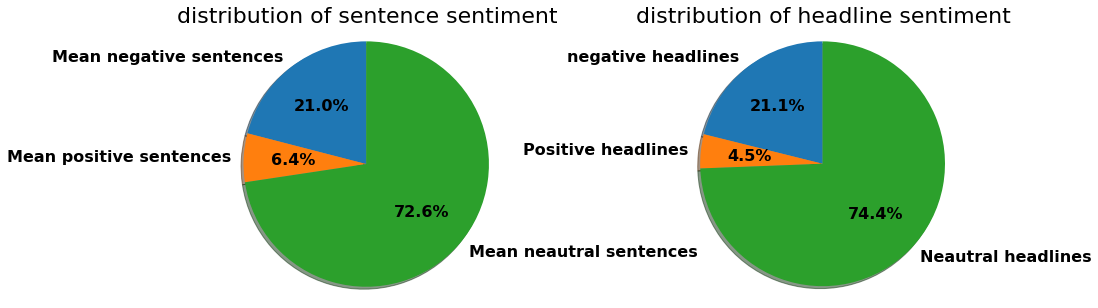

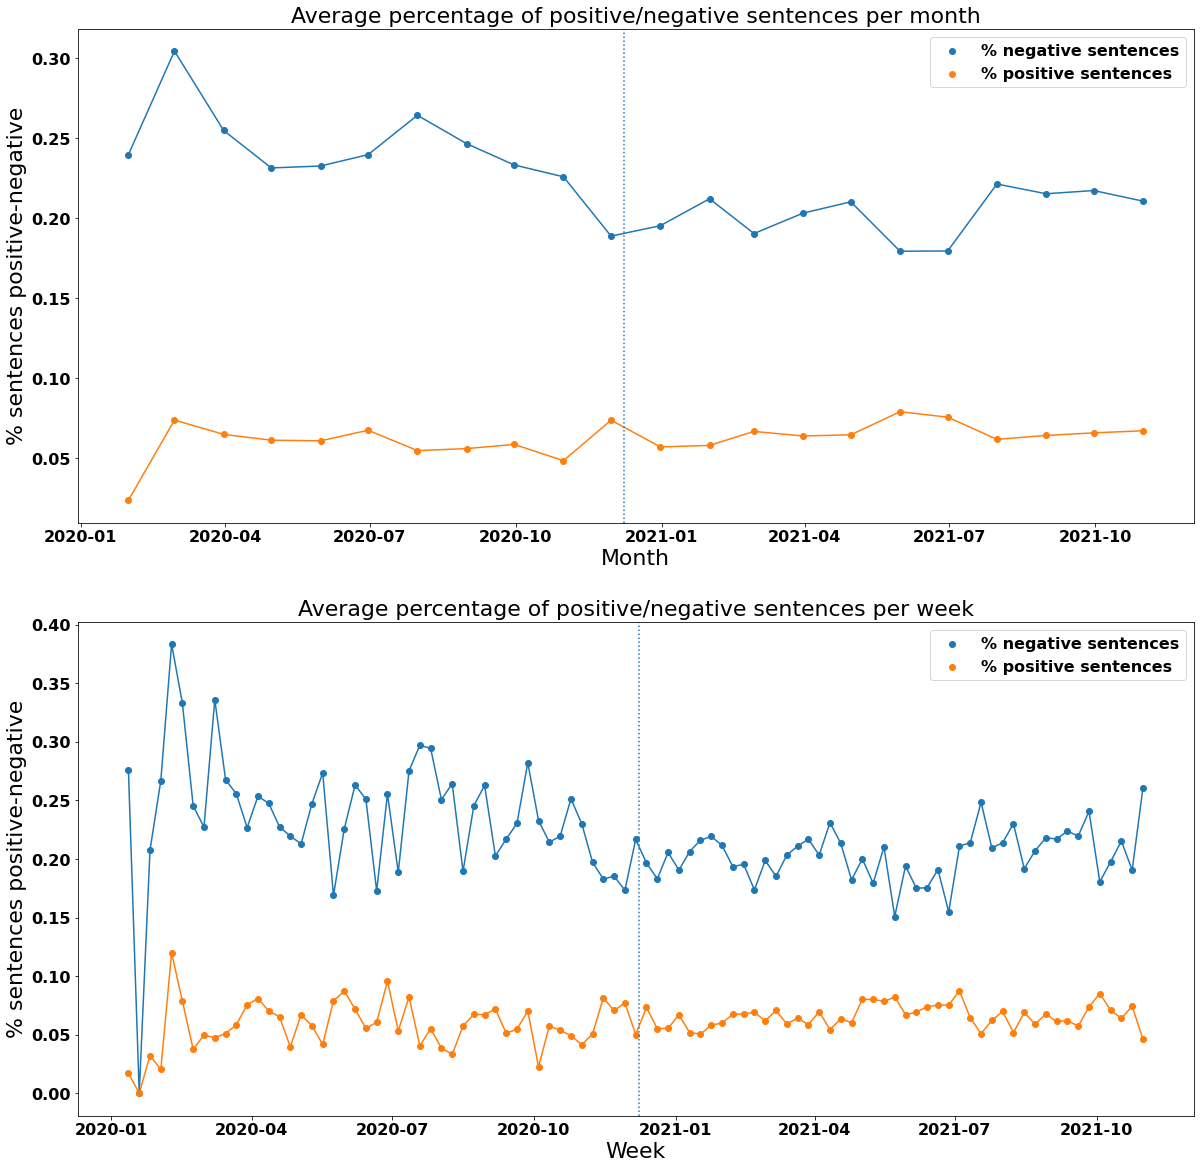

In [12]:
sentiment_analysis(df,'2020-12-08')

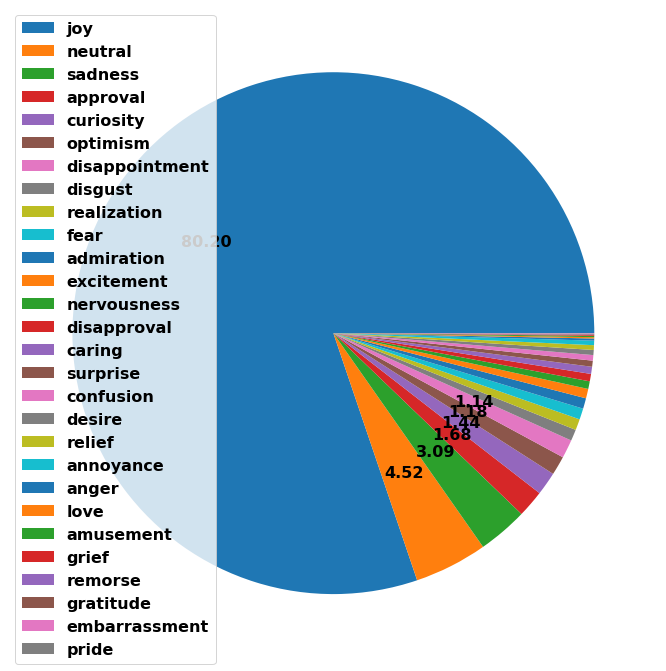

In [84]:
emotion_analysis(df)

In [89]:
# df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_sw_english_title_emotion.csv', index = False)

In [ ]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_sw_english_title_emotion.csv')

In [87]:
pd.options.display.max_colwidth = 100
len(df[df['emotion_transformers_1']=='neutral'])

4910

In [39]:
def plot_emotions(subset):
    ax = subset['emotion_transformers_1'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct,textprops={'fontsize': 10})
    ax.axes.get_yaxis().set_visible(False)
#     plt.legend()

In [21]:
len(df[df['emotion_transformers_1']=='neutral'])

4910

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


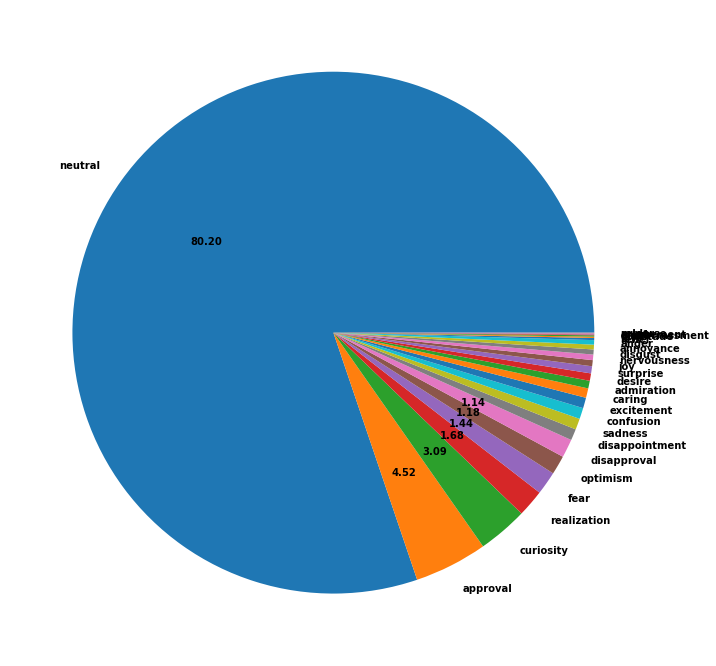

In [40]:
plot_emotions(df)

# SUBTOPICS 

I think it is useful for the analysis of subtopics not to take into account the articles that review the most important news of the week, because they deal with many different topics and I consider that they have an impact on the results.

In [8]:
df_sub=df.drop(df[df['n_words']>3000].index,inplace=False)

In [9]:
ue_words="European Union|EU|European Commission"
european_union=df_sub[(df_sub['Title_en'].str.contains(ue_words))|(df_sub['Text_en'].str.contains(ue_words))]

In [10]:
len(european_union)/len(df_sub)

0.18708935611038108

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Antonio Guterres: "Pandemic vaccine must be seen as a public good
The American market, the golden goose for Swiss exporters
Innovation as a societal and stock market driver
SAMPLES OF NEGATIVE HEADLINES
Coronavirus - AstraZeneca back in the spotlight, record number of deaths in Brazil
The US enters the great game of "vaccine diplomacy".
Vaccines: Doctors Without Borders denounces Brussels' "hypocrisy


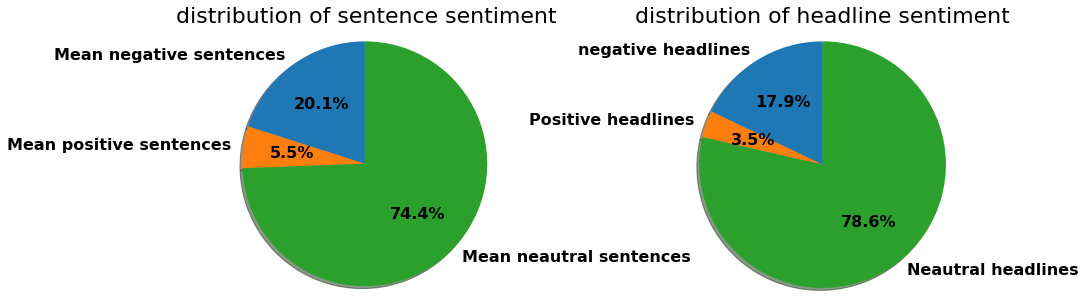

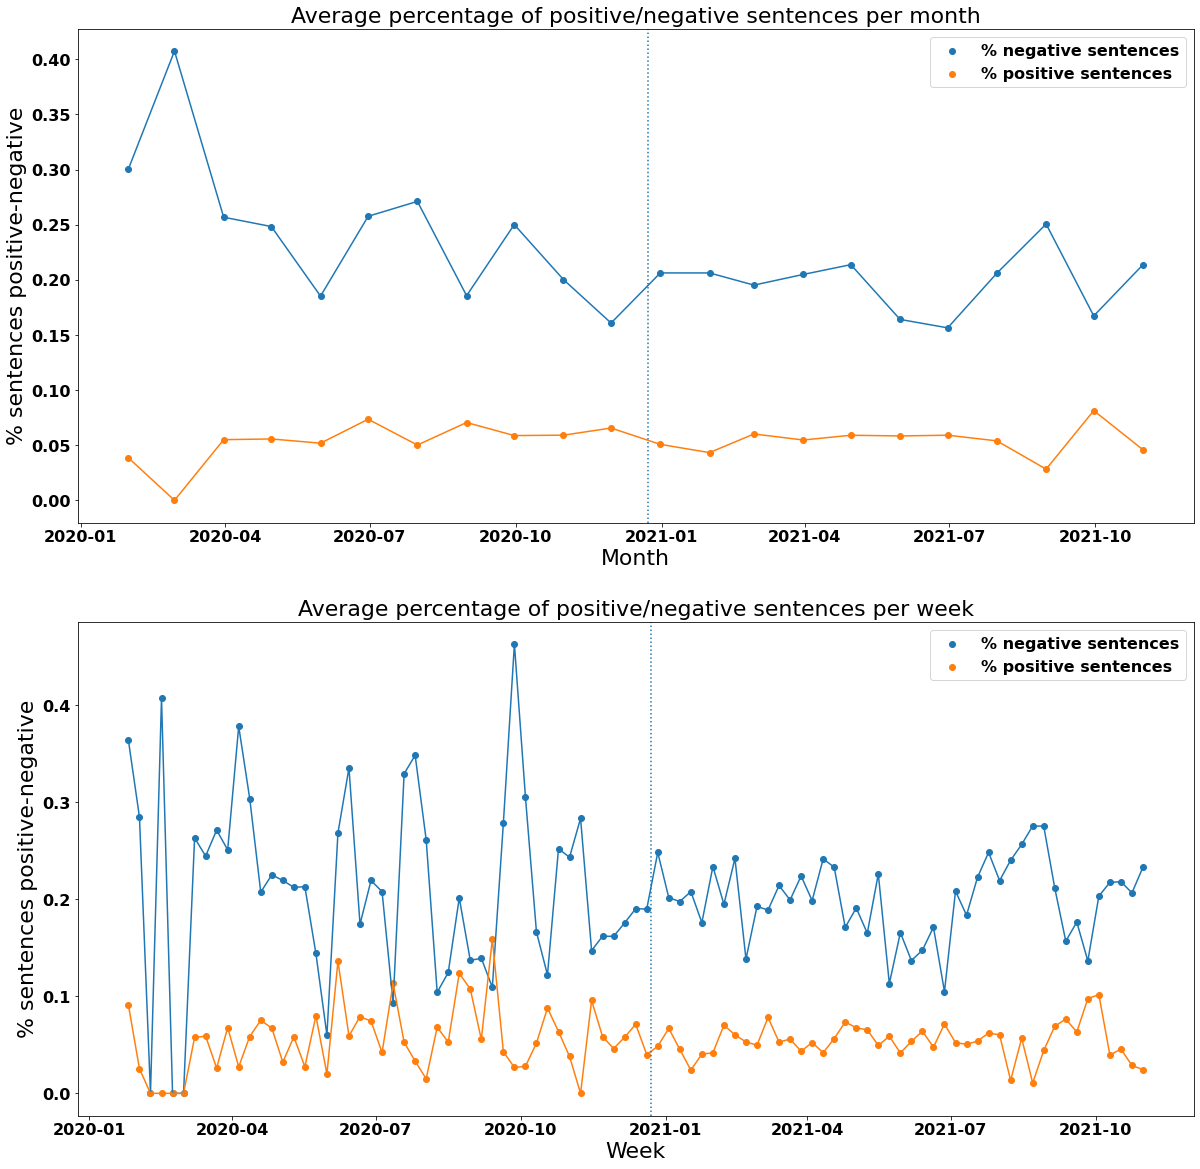

In [11]:
sentiment_analysis(european_union,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


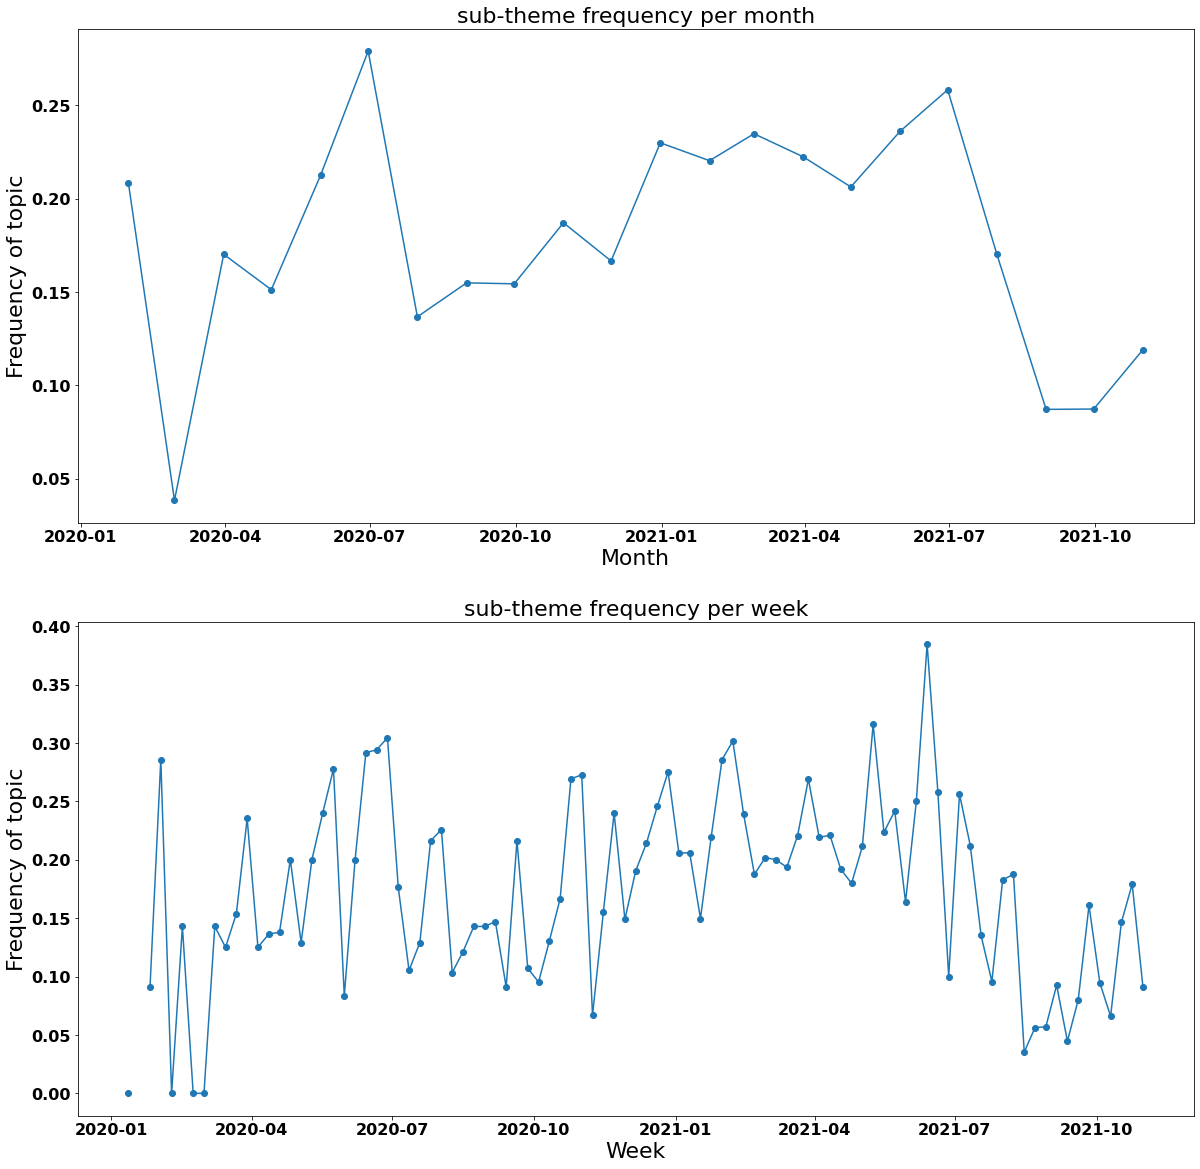

In [12]:
frequency_topics(df_sub, european_union)

In [13]:
# #get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(european_union.list_labels[39]) if x == 0]
# for i in indices: 
#     print(european_union.list_sentences[39][i])

In [14]:
sentences_with_word(european_union,ue_words)

ValueError: Length of values (146040) does not match length of index (6515977)

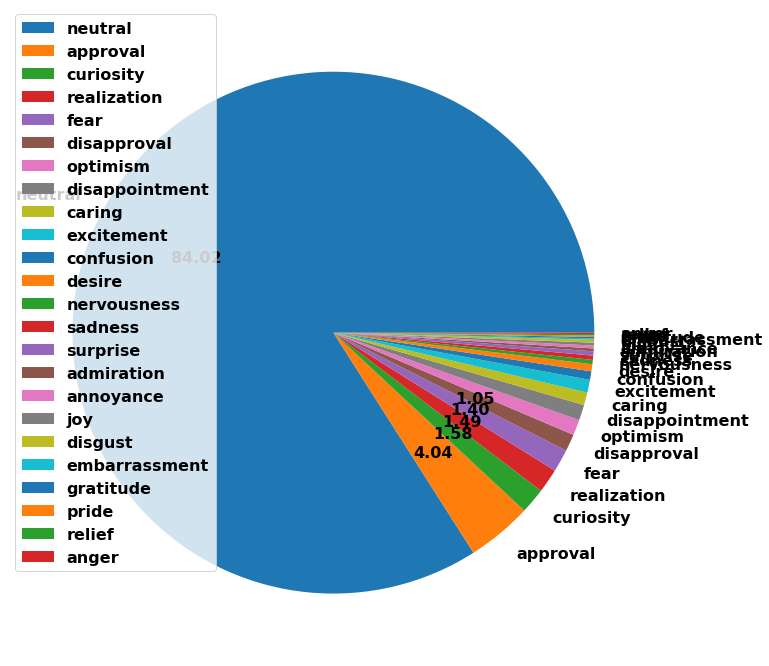

In [18]:
plot_emotions(european_union)

In [19]:
no_vax_words="anti-vaxxers|anti-vaccine|anti-vaxx|anti-corona|no-vax|no vax|anti-vaccin"
no_vax=df_sub[(df_sub['Title_en'].str.contains(no_vax_words))|(df_sub['Text_en'].str.contains(no_vax_words))]
len(no_vax)/len(df_sub)

0.03827201051248357

SAMPLES OF POSITIVE HEADLINES
Editorial - Respect the undecideds
The man of reforms - Mario Draghi puts Italy back at the centre of the European game
Bruno Tertrais: "This pandemic is the perfect stress test for contemporary global society".
SAMPLES OF NEGATIVE HEADLINES
Switzerland without a captain - The question of morality at the heart of the Xhaka case
Two centuries of opposition to vaccines
The eternal battle of the anti-vaccine movement


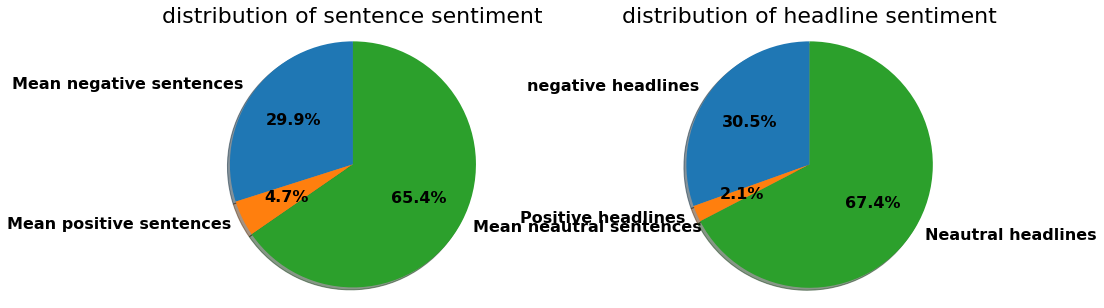

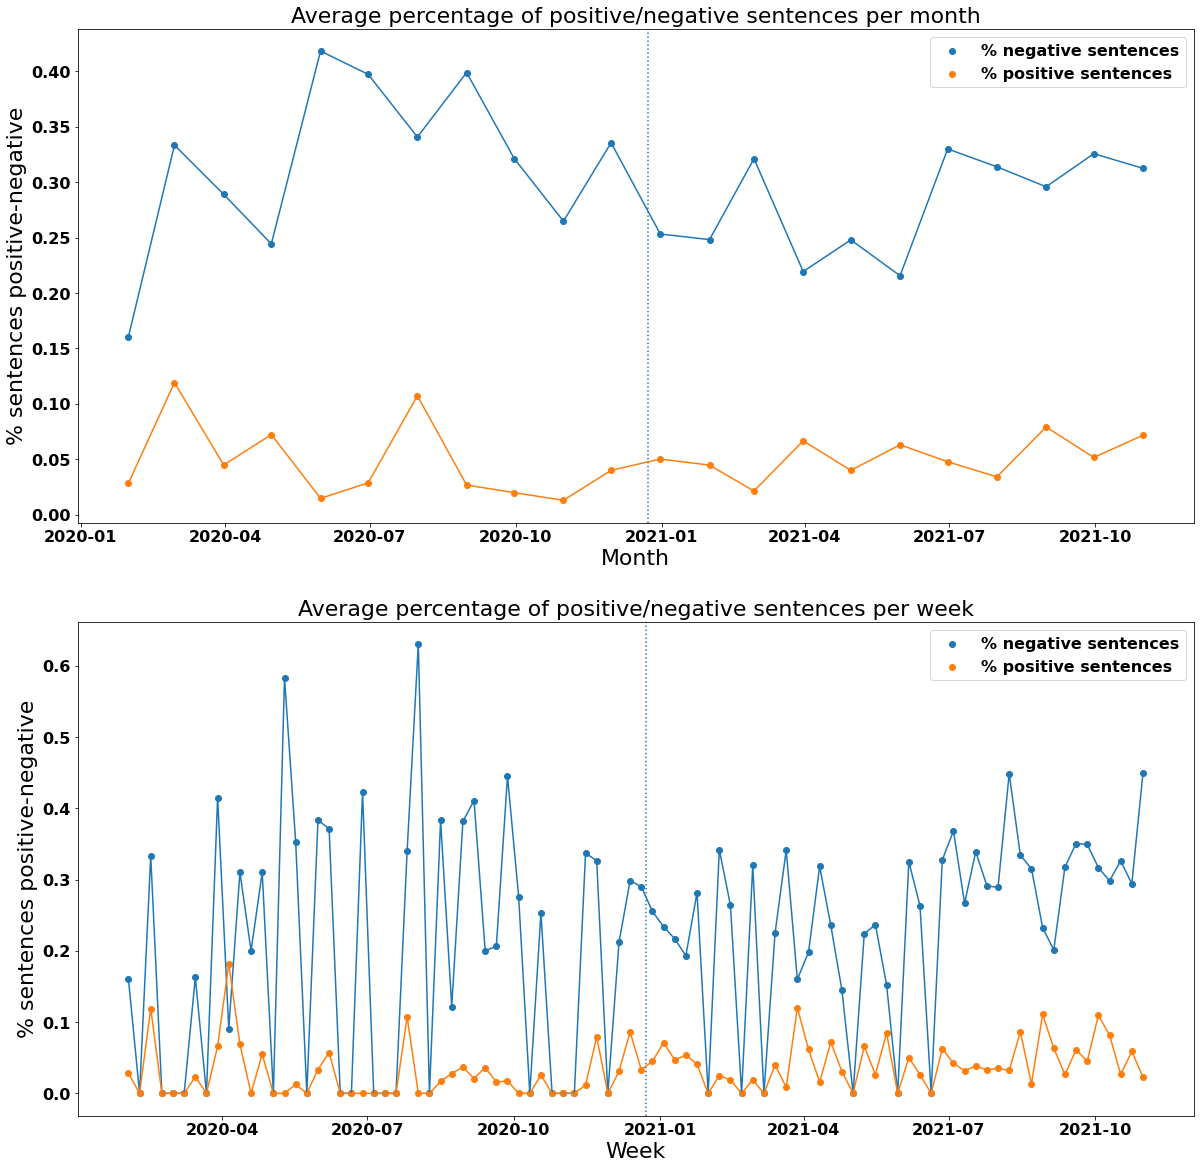

In [20]:
sentiment_analysis(no_vax,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


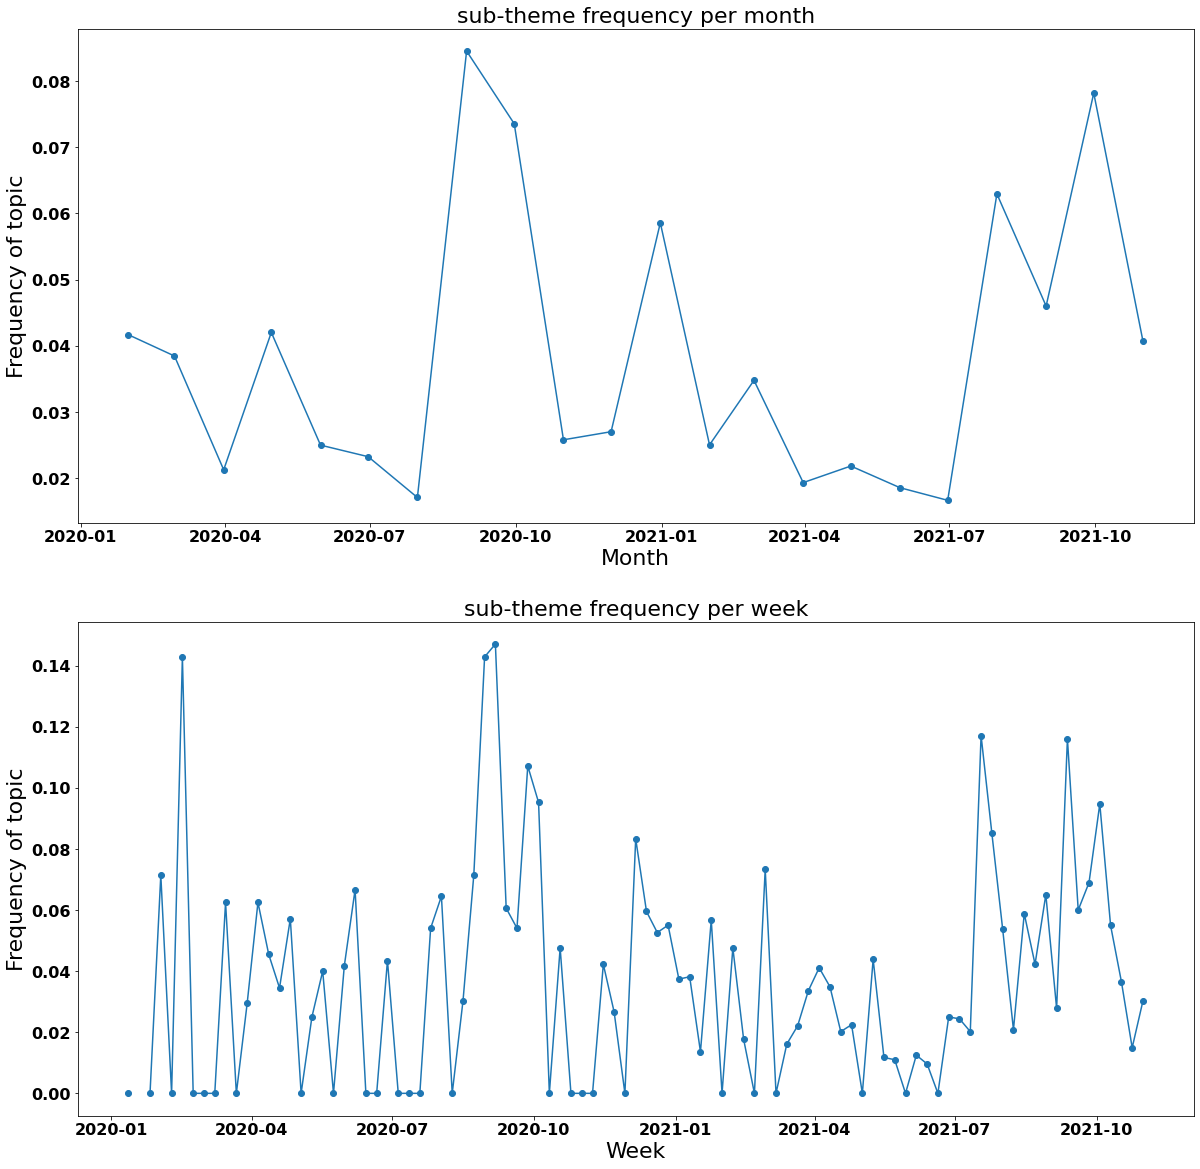

In [21]:
frequency_topics(df_sub, no_vax)

In [45]:
# ### get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(no_vax.list_labels[33]) if x == 0]
# for i in indices: 
#     print(no_vax.list_sentences[33][i])

SAMPLES OF POSITIVE SENTENCES
No samples of positive sentences
SAMPLES OF NEGATIVE SENTENCES
Jan Redmann, leader of the CDU in the Brandenburg state parliament, said on the same social network: "1,000 new infections a day and in Berlin there are demonstrations against anti-coronavirus measures?
Just ask people around you or in your family: here, it's neighbours who think that "the coronavirus vaccine is full of dangerous or toxic components", there it's a relative who has always been anti-vaccine, even for measles.


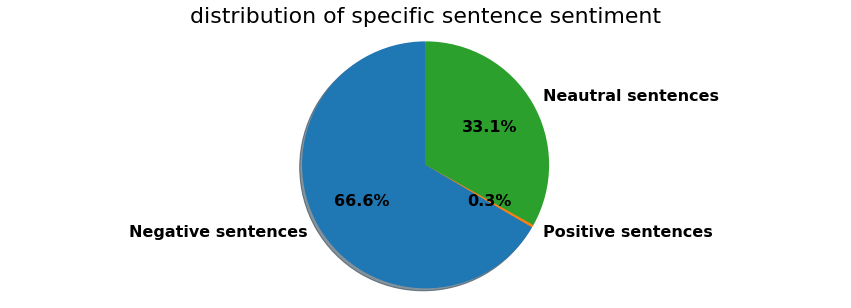

In [46]:
sentences_with_word(no_vax,no_vax_words)

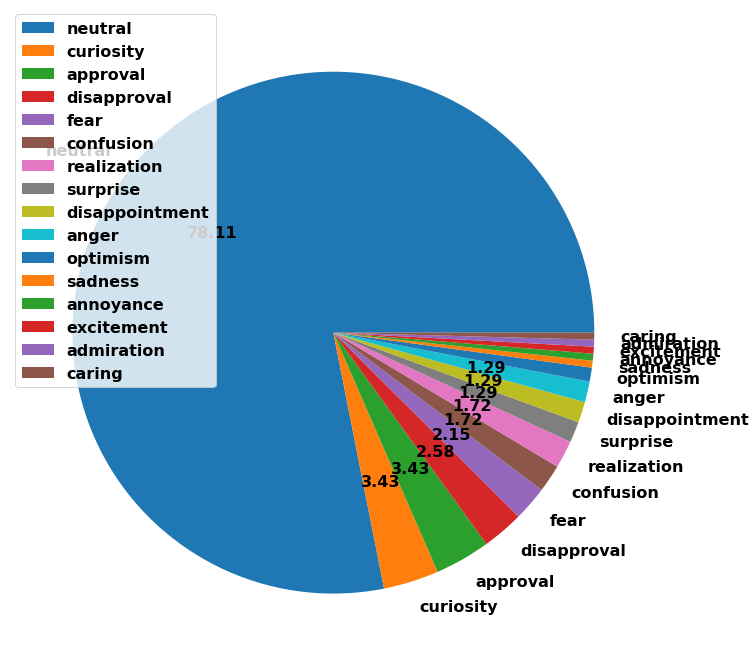

In [22]:
plot_emotions(no_vax)

In [48]:
economy_words="gdp|bank|economy|economist|investment|market"
economy=df_sub[(df_sub['Title_en'].str.contains(economy_words))|(df_sub['Text_en'].str.contains(economy_words))]
len(economy)/len(df_sub)

0.35249671484888306

SAMPLES OF POSITIVE HEADLINES
"Pandemic", Netflix's nice health shot
International recognition - Russia celebrates Sputnik vaccine success
Teleworking in Swiss banks has proved successful
SAMPLES OF NEGATIVE HEADLINES
Virus spreads in America, threatens Europe with second wave
This anger that vaccines do not calm
"There will be three or four vaccines at the end of the year".


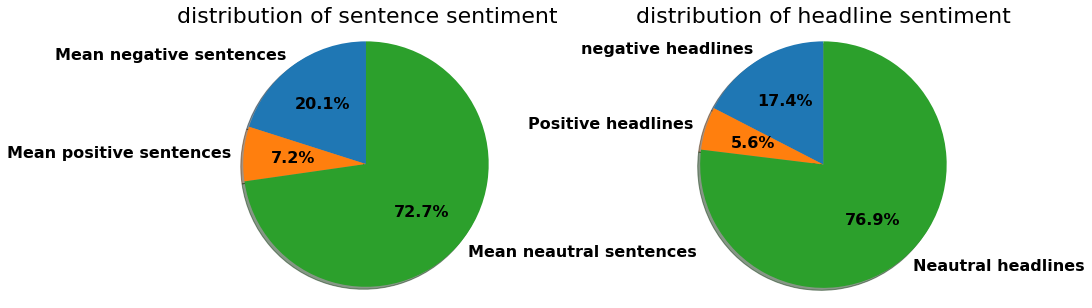

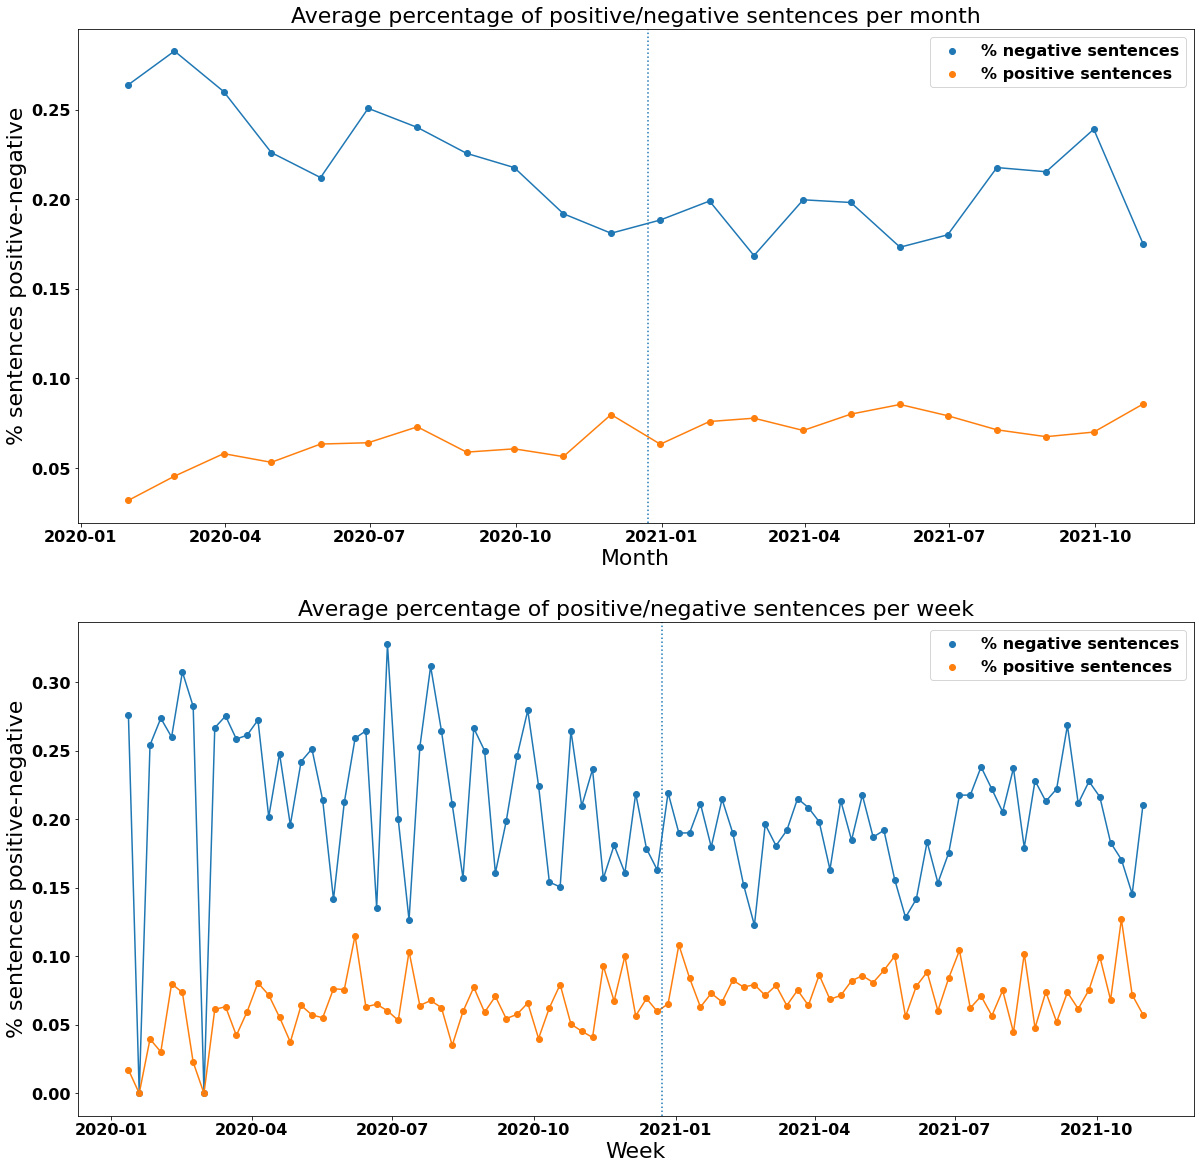

In [49]:
sentiment_analysis(economy,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


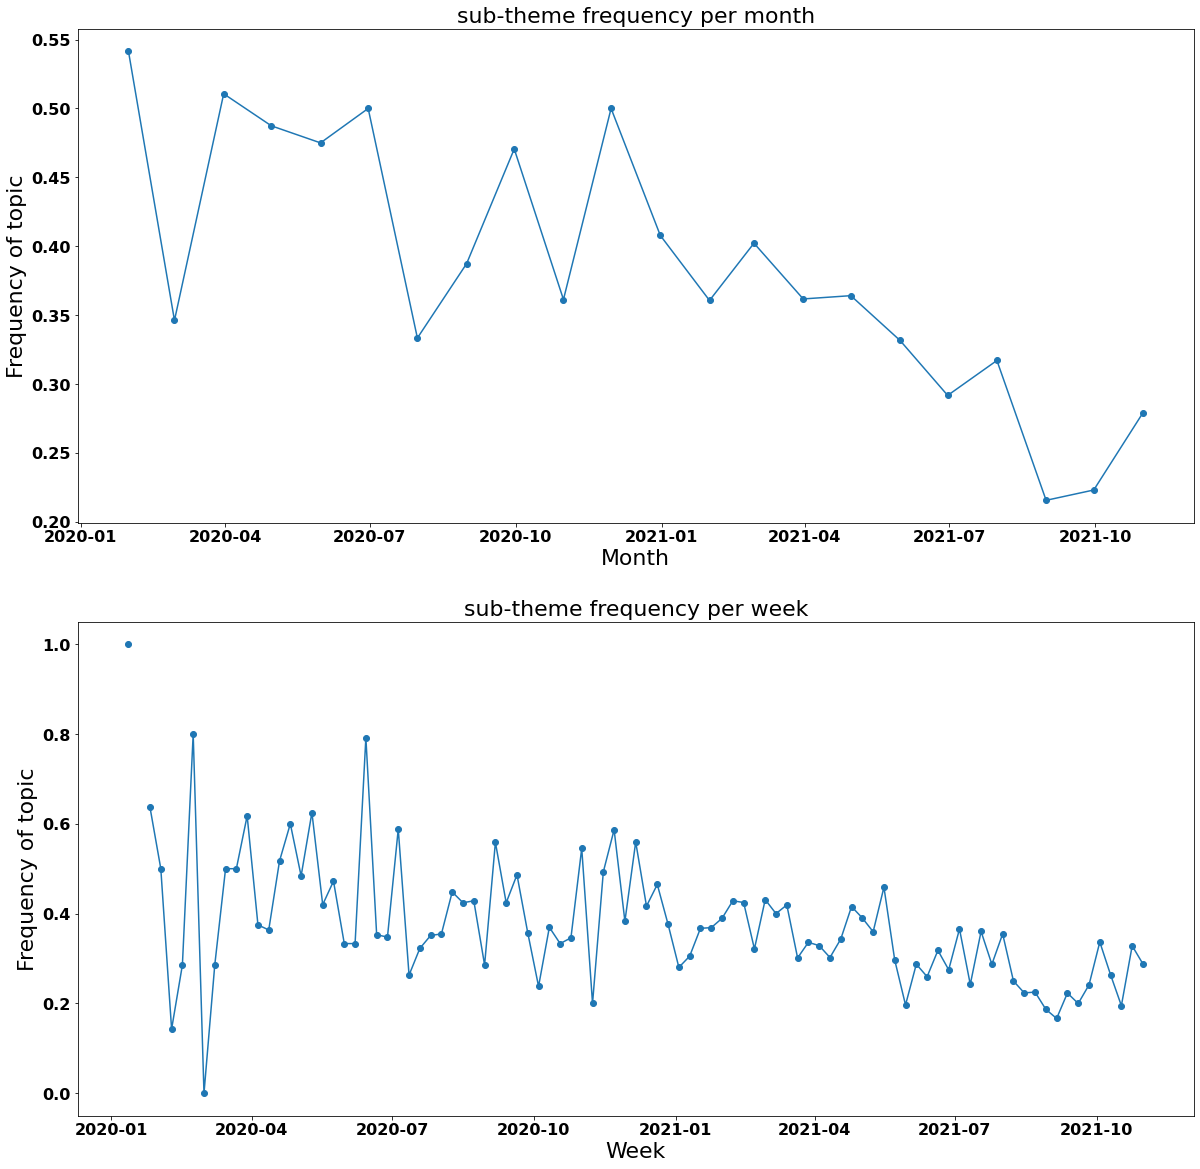

In [50]:
frequency_topics(df_sub, economy)

SAMPLES OF POSITIVE SENTENCES
The economy is all-powerful.
By counting on the success of the vaccination campaign, his good management of the pandemic, and above all on the recovery of the economy, he can still hope to win this bet.
SAMPLES OF NEGATIVE SENTENCES
As night fell, a few incidents broke out involving a group of radical protesters who attacked a bank branch before being dispersed by police with tear gas, according to television footage.
The Swiss Union of Crafts and Trades (Usam) deplores a decision that is "catastrophic for the economy and society".


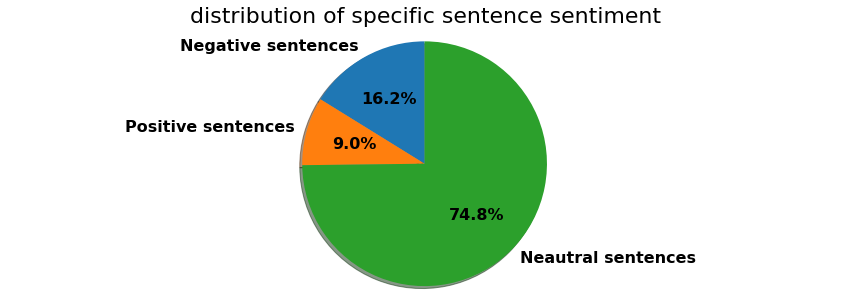

In [51]:
sentences_with_word(economy,economy_words)

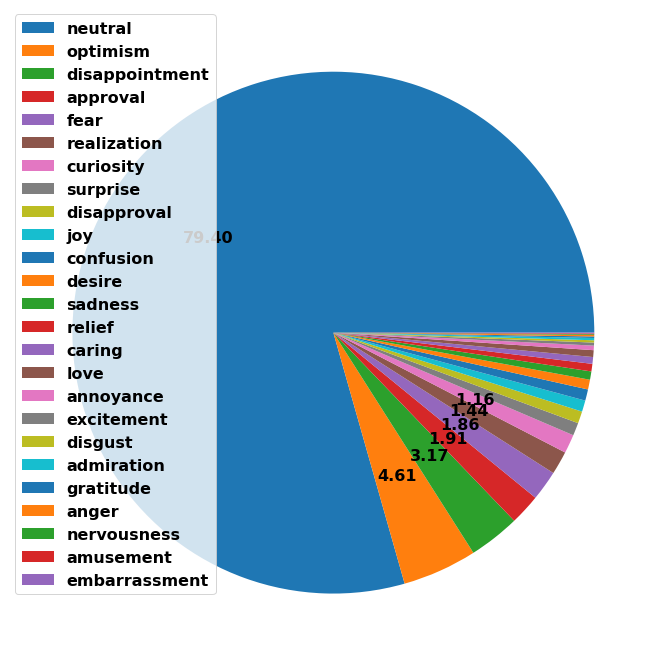

In [54]:
plot_emotions(economy)

In [52]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(economy.list_labels[5]) if x == 0]
for i in indices: 
    print(economy.list_sentences[5][i])

States in the US have put millions at stake in vaccine raffles.
There would certainly be a certain injustice towards those who have already stretched their arms without benefiting from any material gain.
It is also regrettable to have to talk about money to encourage a civic act.
Unfortunately, getting back to the way things were has a price.


In [55]:
education_words="education|pupil|classroom|student|school"
education=df_sub[(df_sub['Title_en'].str.contains(education_words))|(df_sub['Text_en'].str.contains(education_words))]
len(education)/len(df_sub)

0.22289750328515112

SAMPLES OF POSITIVE HEADLINES
Israeli elections: Netanyahu speaks of a huge victory
Health crisis - Five good reasons to remain optimistic about the virus
Klaus Schwab: "Young people hold the keys to a better future
SAMPLES OF NEGATIVE HEADLINES
Two centuries of opposition to vaccines
Countries unequal in the face of the pandemic
Four pricks instead of two


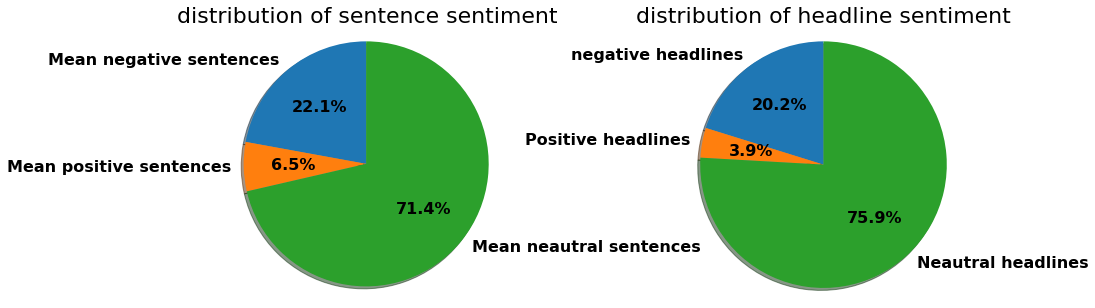

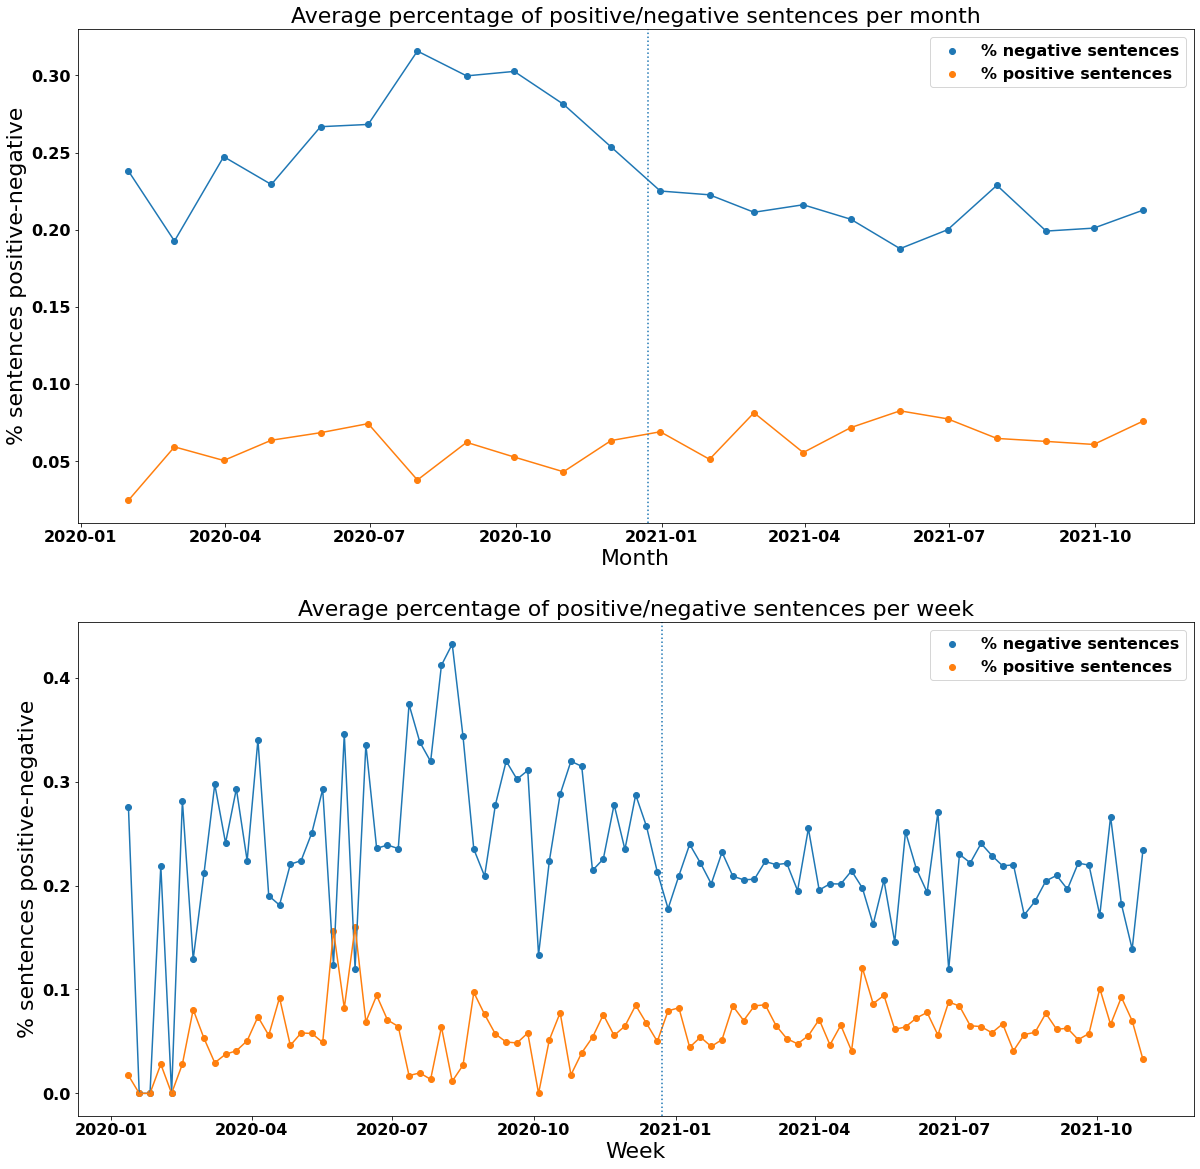

In [56]:
sentiment_analysis(education,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


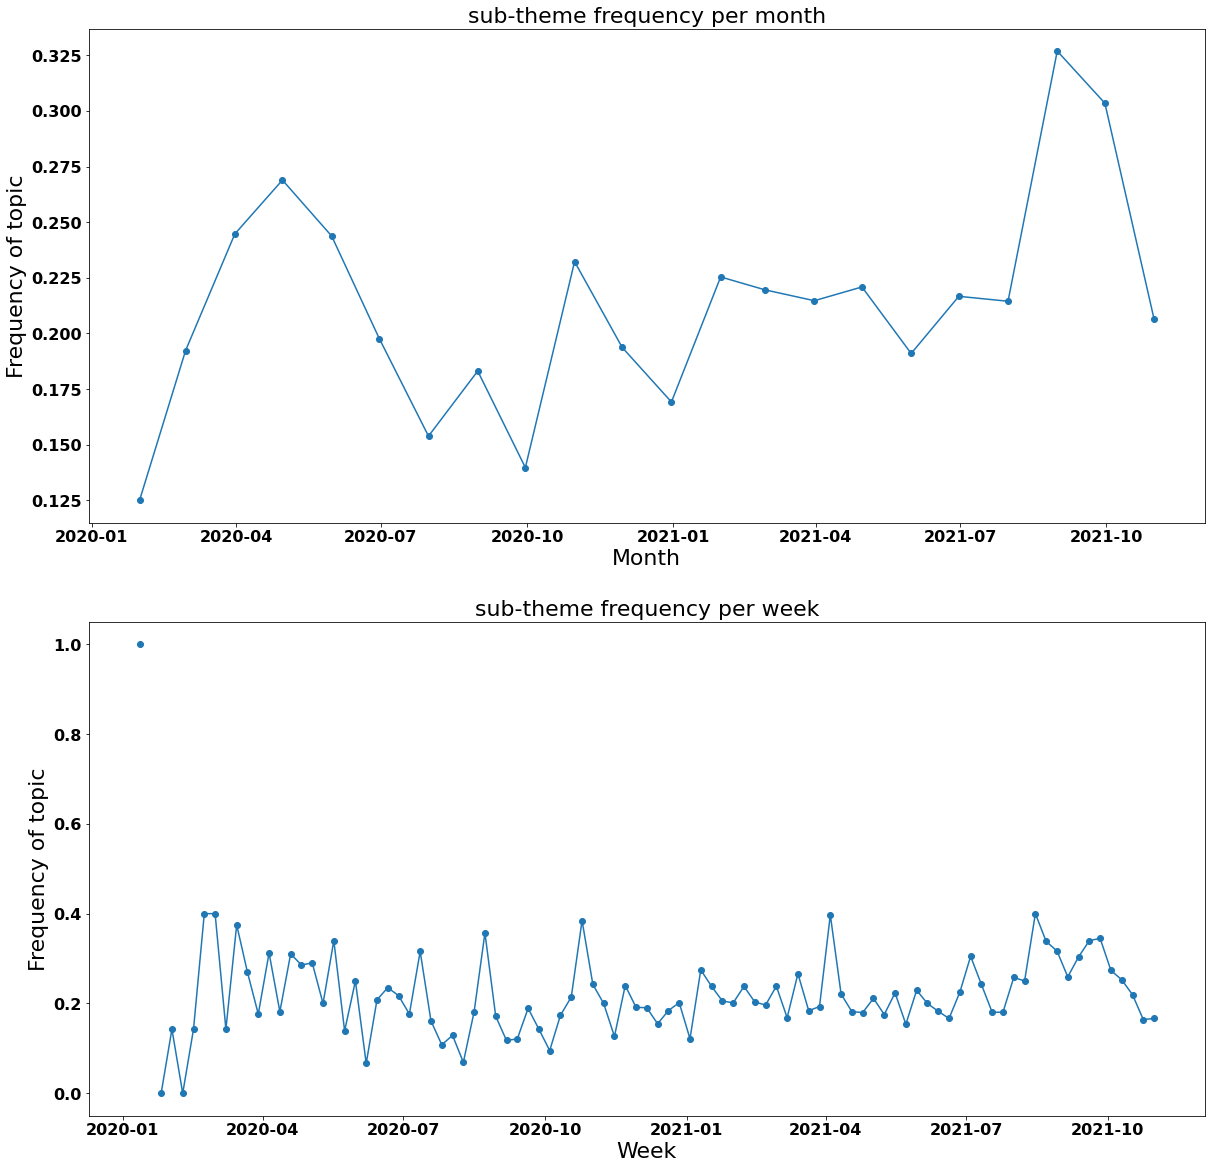

In [57]:
frequency_topics(df_sub, education)

SAMPLES OF POSITIVE SENTENCES
I didn't do it, but I chose for my pupils, and they liked it very much, the "Praise be to the Lord full of glory" from "Roi David" by Honegger.
Mario Draghi, known for his discretion, seriousness and determination, is "an extremely well-prepared and determined person", Giuliano Noci, a professor of strategy at the Polytechnic business school in Milan, told AFP.
SAMPLES OF NEGATIVE SENTENCES
In another EMS, a nurse explains: "Because of my education, I am not very favourable to vaccines.
Two primary school classes were quarantined in Ticino, while a tea dance in the canton of Glarus resulted in 400 quarantines.


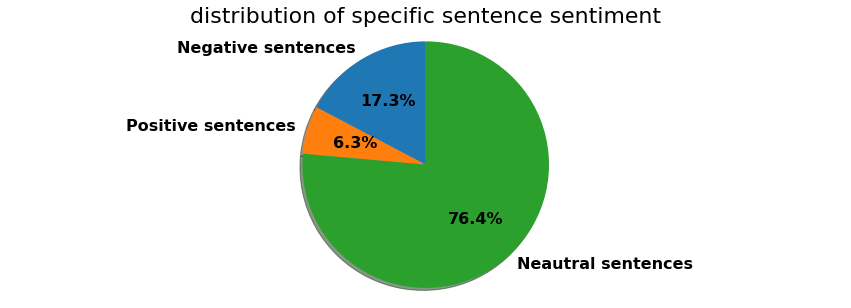

In [58]:
sentences_with_word(education,education_words)

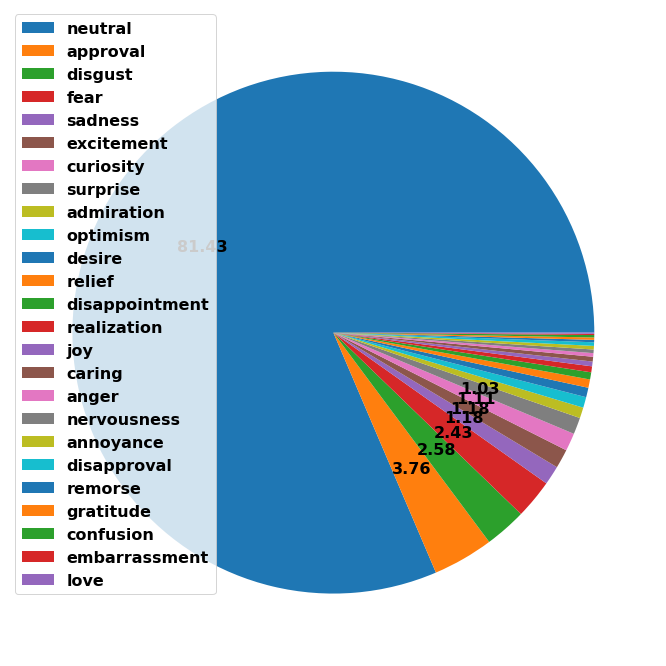

In [60]:
plot_emotions(education)

In [34]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(education.list_labels[25]) if x == 2]
for i in indices: 
    print(education.list_sentences[25][i])

The number of female recruits continues to rise.


SAMPLES OF POSITIVE HEADLINES
The man of reforms - Mario Draghi puts Italy back at the centre of the European game
The Cannes Film Festival reveals a rich selection that sounds the great return of auteur cinema
Budapest's pride march was the largest in the country's history
SAMPLES OF NEGATIVE HEADLINES
Alain Berset admits that Switzerland has been too optimistic
Interpol warns against Vaccine Mafia
Infected athletes - Games open amidst highly dangerous epidemic


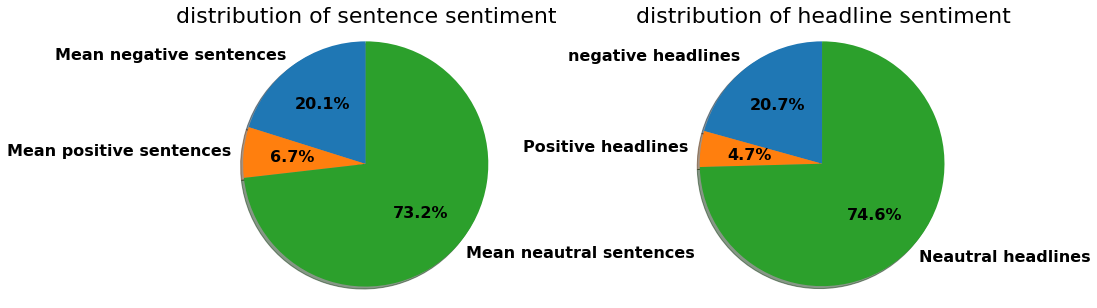

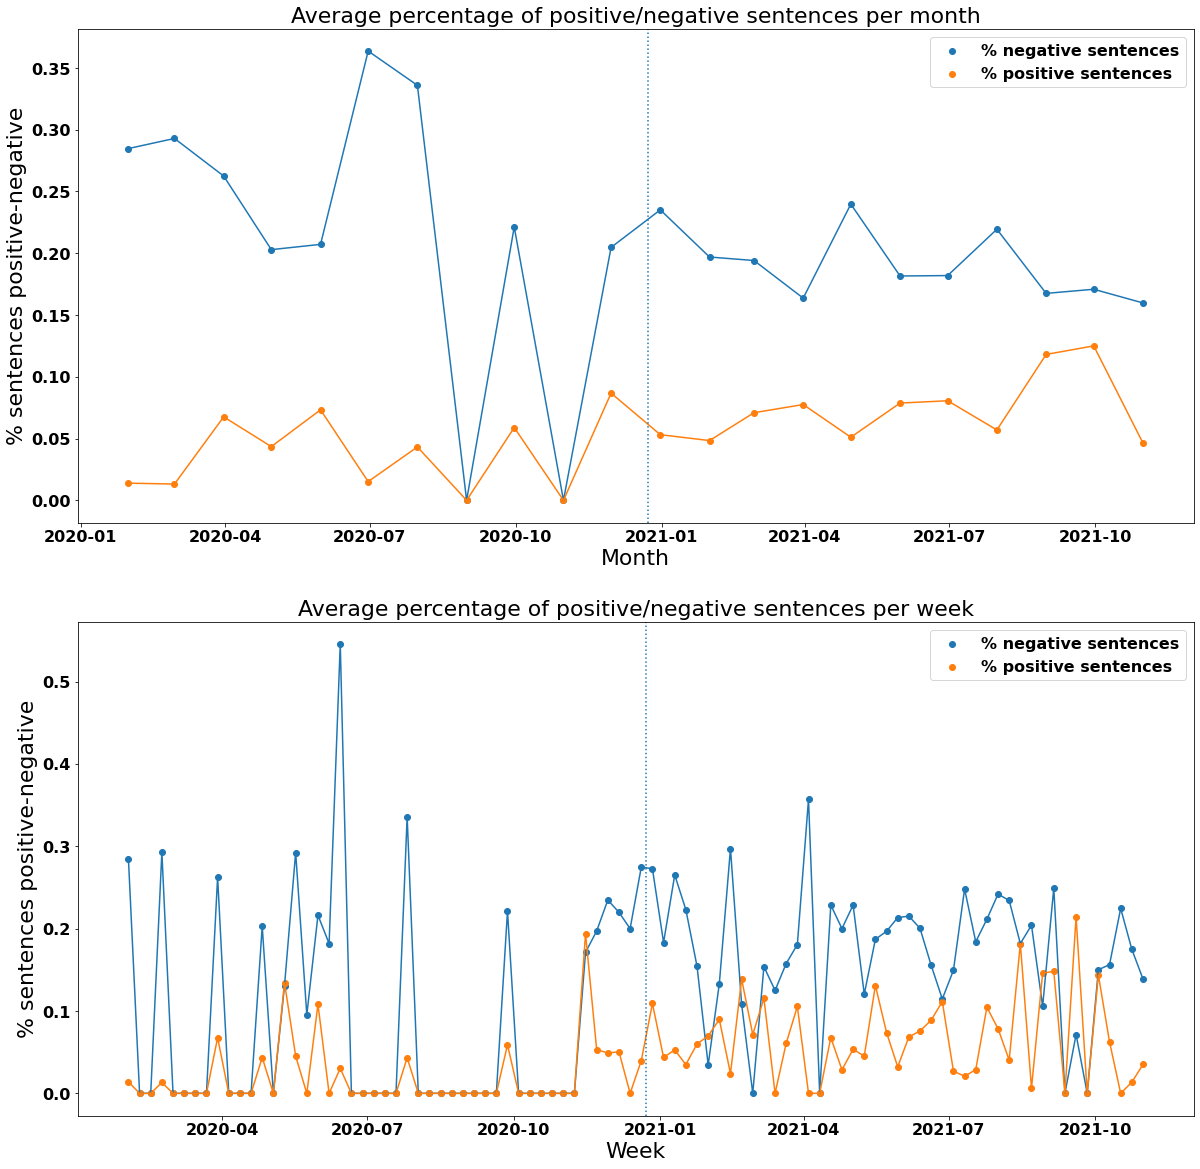

0.03810775295663601

In [73]:
olympics_words="Olympics|Olympic Games|Tokyo"
olympics=df_sub[(df_sub['Title_en'].str.contains(olympics_words))|(df_sub['Text_en'].str.contains(olympics_words))]
sentiment_analysis(olympics,'2020-12-23')
len(olympics)/len(df_sub)

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


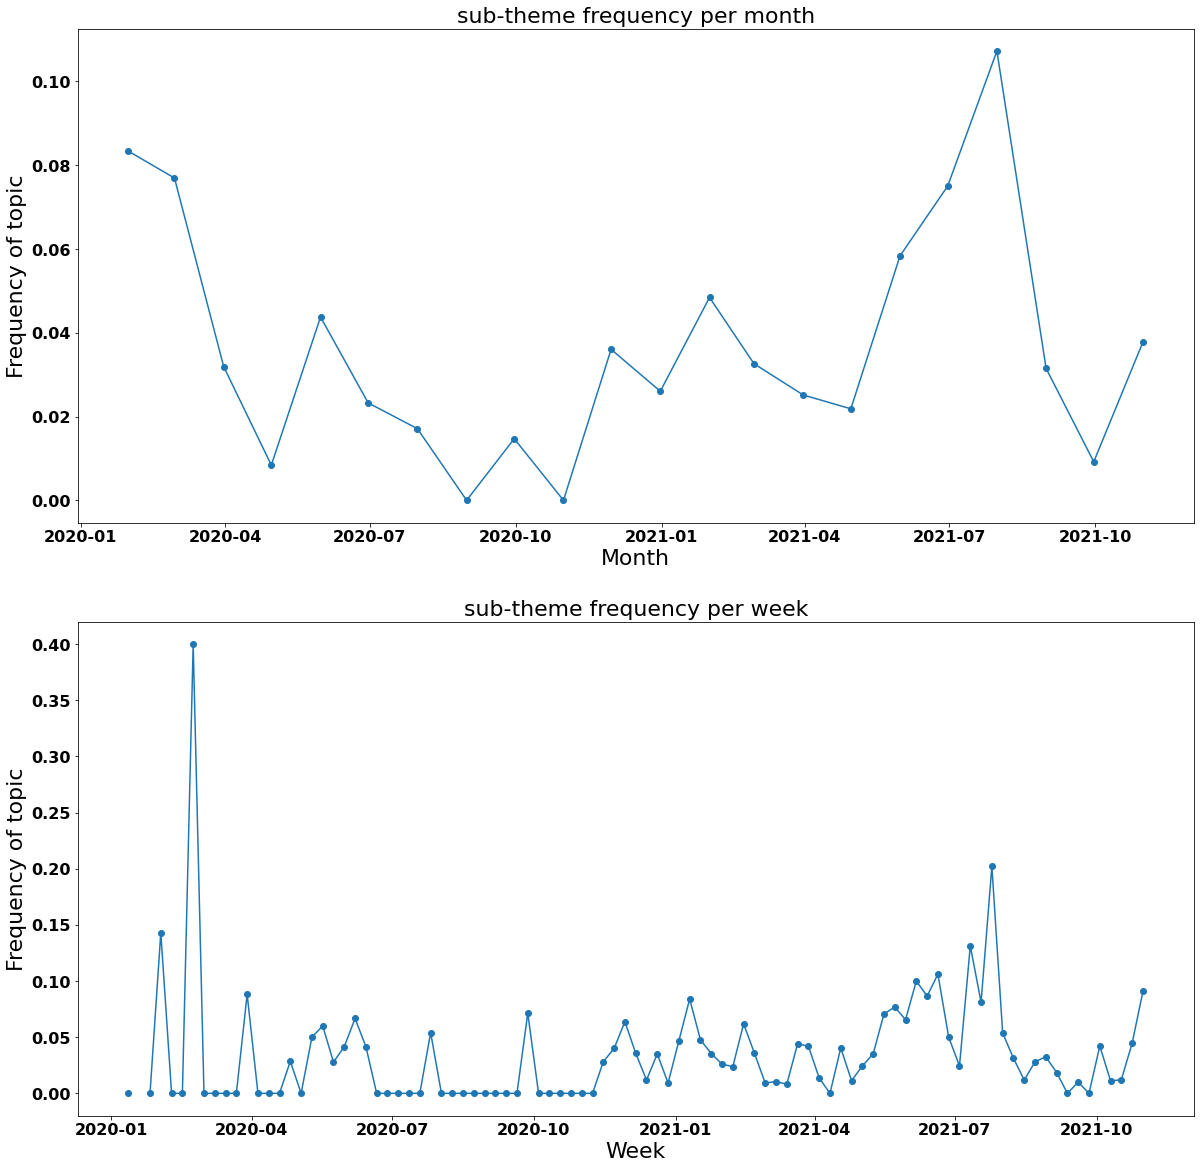

In [74]:
frequency_topics(df_sub,olympics)

SAMPLES OF POSITIVE SENTENCES
In Tokyo, the Nikkei index jumped 8.04% to 19,546.63 points (+1,454.28 points), its biggest percentage gain since October 2008, after jumping more than 7% the previous day.
"In the summer of next year, Japan is determined to host the Tokyo Olympic and Paralympic Games as proof of humanity's victory over the coronavirus pandemic," Yoshihide Suga said in a pre-recorded video message.
SAMPLES OF NEGATIVE SENTENCES
"Three members of the South African football delegation tested positive for Covid-19 and are in isolation in a suitable Tokyo 2020 facility," the South African Olympic Committee said in a statement, adding that the other members of the football team had tested negative.
All its inhabitants can be injected with a booster, a few months before the Winter Olympics which will take place in February in the Chinese capital.


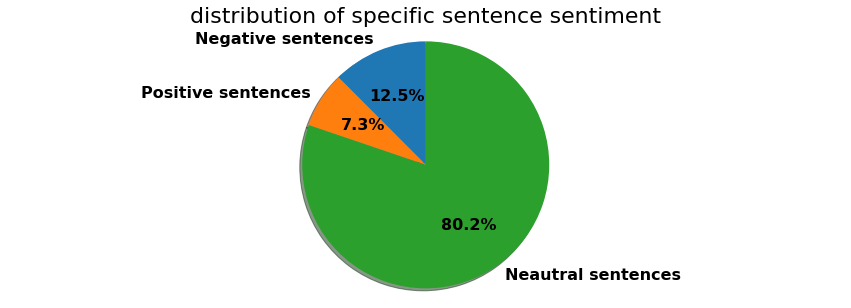

In [75]:
sentences_with_word(olympics,olympics_words)

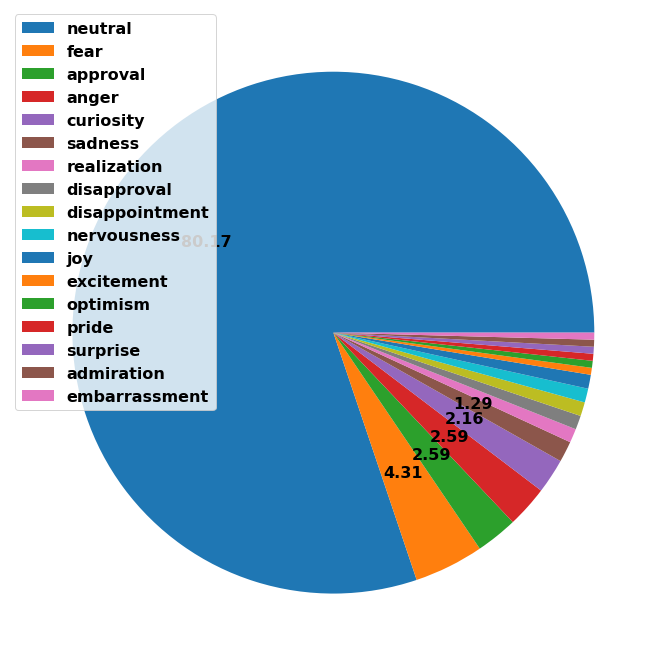

In [76]:
plot_emotions(olympics)

In [77]:
# ### get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(olympics.list_labels[14318]) if x == 0]
# for i in indices: 
#     print(olympics.list_sentences[14318][i])

## COUNTRIES

In [78]:
usa_words="United States|US|Biden|Trump"
usa=df_sub[(df_sub['Title_en'].str.contains(usa_words))|(df_sub['Text_en'].str.contains(usa_words))]

In [79]:
len(usa)/len(df_sub)

0.38157030223390276

SAMPLES OF POSITIVE HEADLINES
In Moscow, the summit is presented as a victory for Putin
The Middle East offers a breath of fresh air to Geneva tourism
They are 90% effective - Dogs to detect Covid in EMS
SAMPLES OF NEGATIVE HEADLINES
The Europe that vaccinates
Amnesty International condemns inequalities in vaccination
The virus that is infecting Donald Trump's campaign


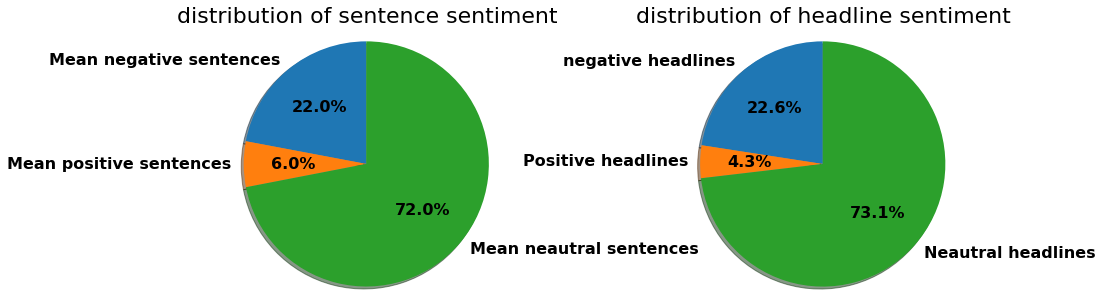

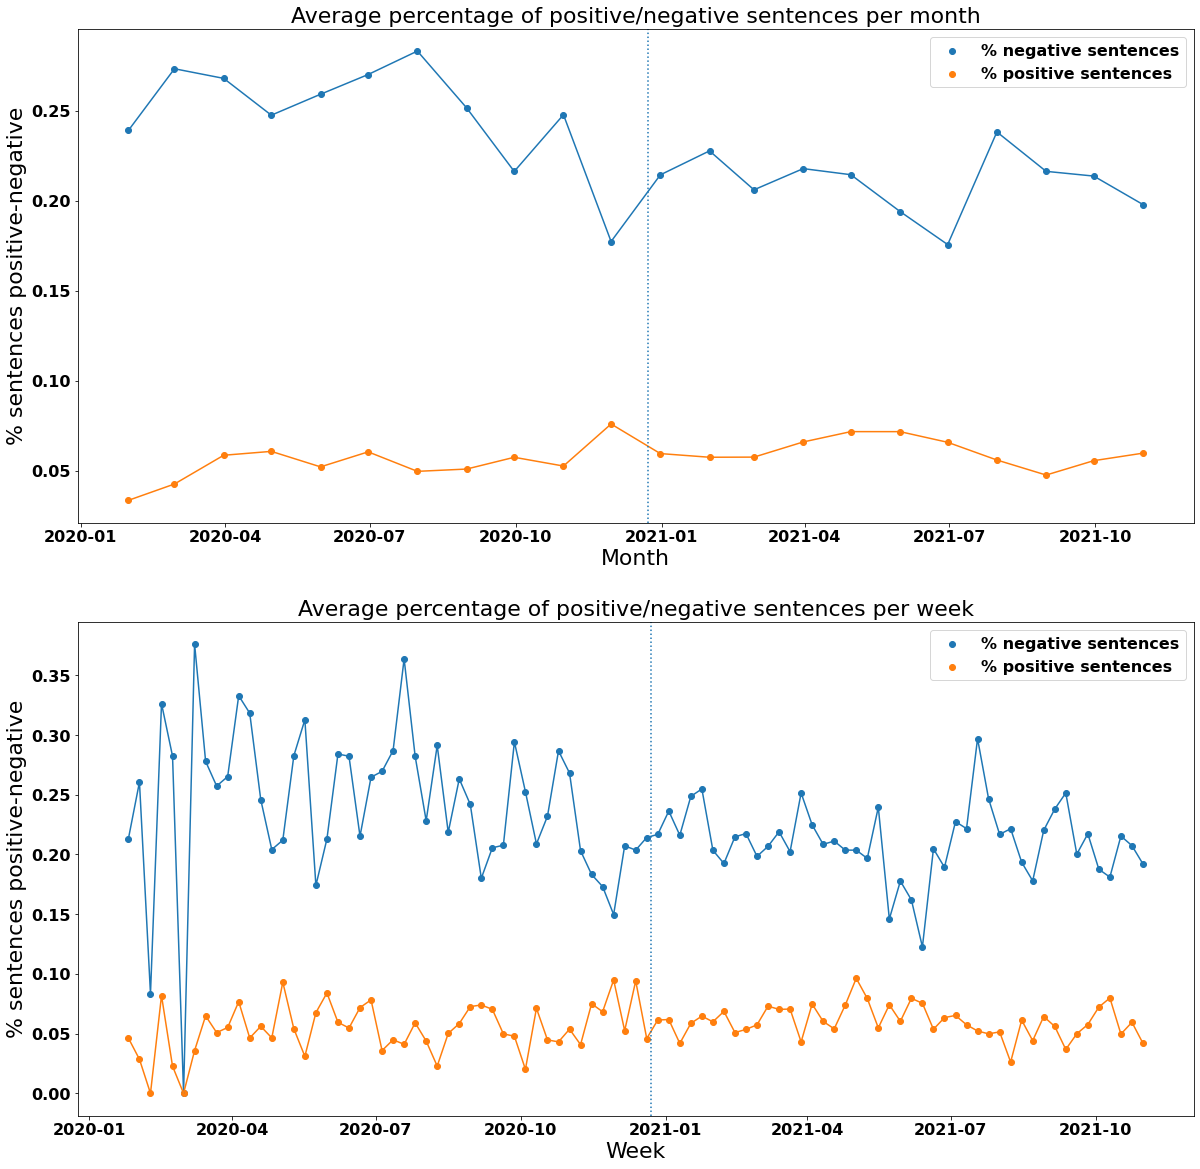

In [80]:
sentiment_analysis(usa,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


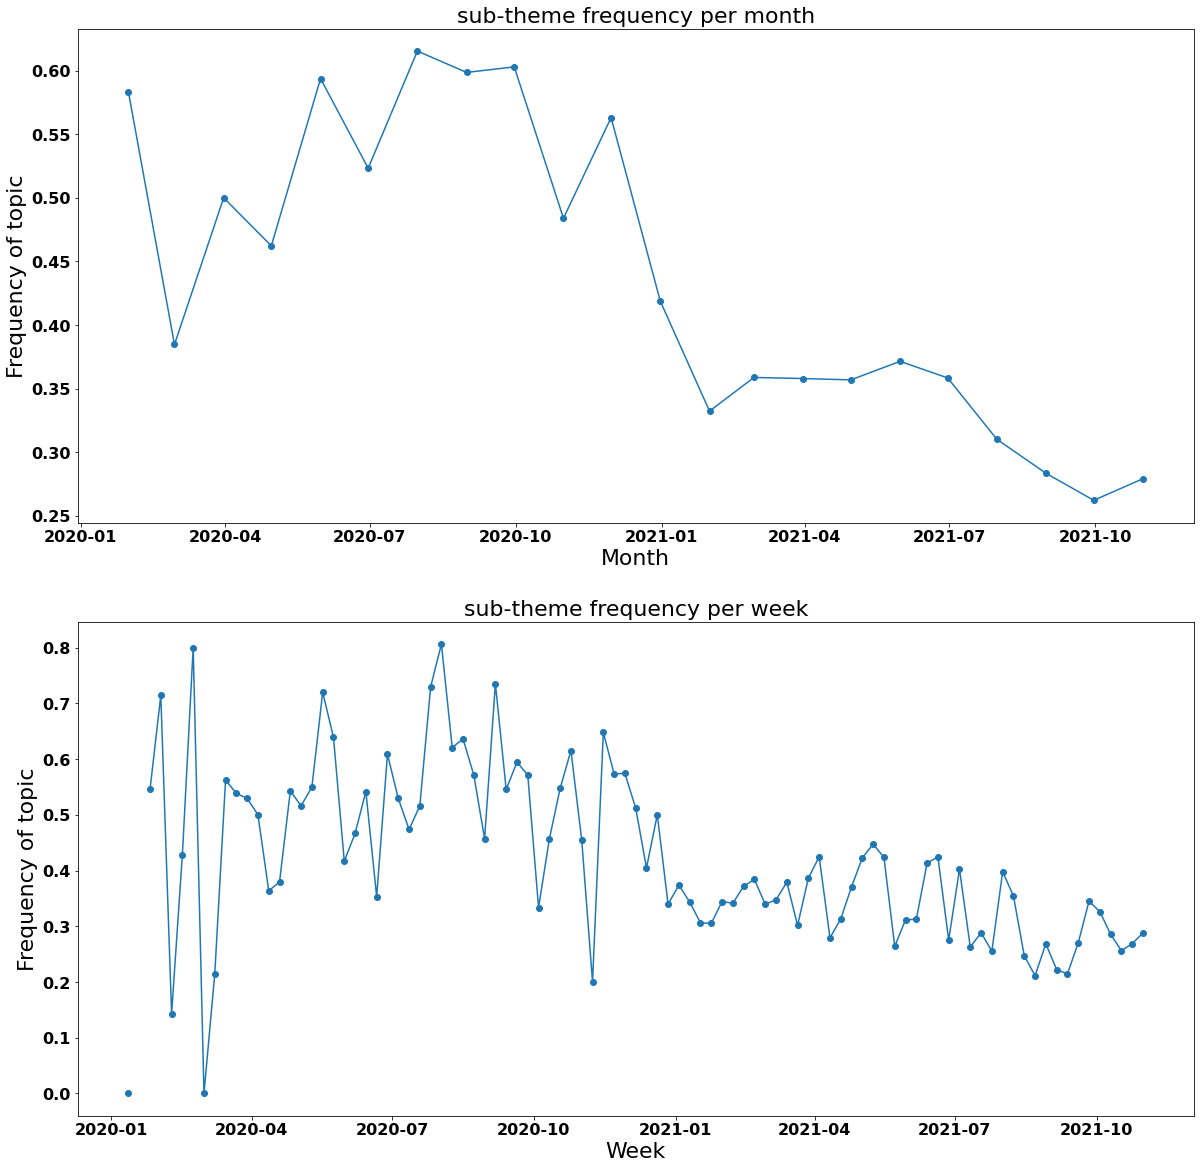

In [81]:
frequency_topics(df_sub,usa)

SAMPLES OF POSITIVE SENTENCES
With the arrival of President Joe Biden, there is a return to the strong partnership between European countries, including Switzerland, and the United States - whether governed by a Democrat or a Republican.
"Exports have been a key driver" thanks to the recovery in the United States, the European Union and the United Kingdom, analyst Rajiv Biswas of IHS Markit told AFP.
SAMPLES OF NEGATIVE SENTENCES
The epidemic is also worsening in the United States, which on Tuesday evening reported a new 24-hour death toll of more than 3,930.
In the United States, GDP is expected to collapse by 8% this year, well above the 5.9% decline estimated in April.


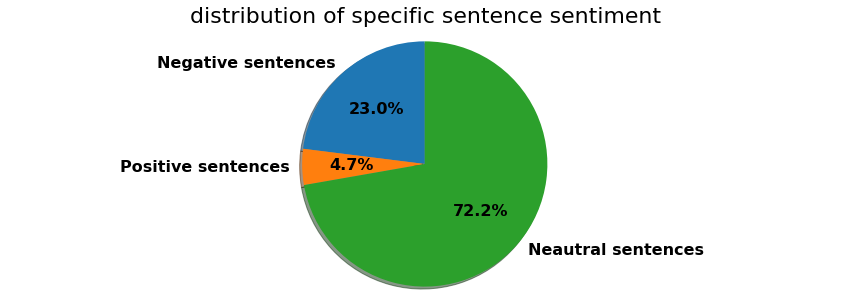

In [82]:
sentences_with_word(usa,usa_words)

In [83]:
russia_words="Russia|Moscow|Putin"
russia=df_sub[(df_sub['Title_en'].str.contains(russia_words))|(df_sub['Text_en'].str.contains(russia_words))]
len(russia)/len(df_sub)

0.10019710906701708

SAMPLES OF POSITIVE HEADLINES
Budapest's pride march was the largest in the country's history
Coronavirus - AstraZeneca/Oxford's vaccine is 70% effective
Estonia helps WHO with a digital "big bang
SAMPLES OF NEGATIVE HEADLINES
Coronavirus - Easter weekend under pressure from Covid-19
The "international community" does not and will not exist
Elections under Kremlin control


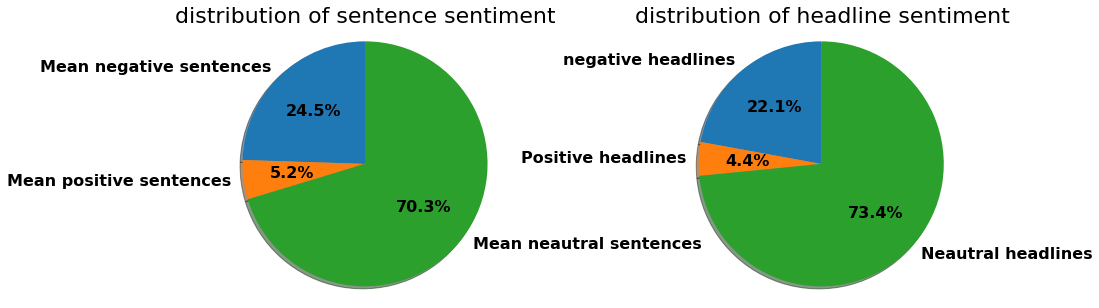

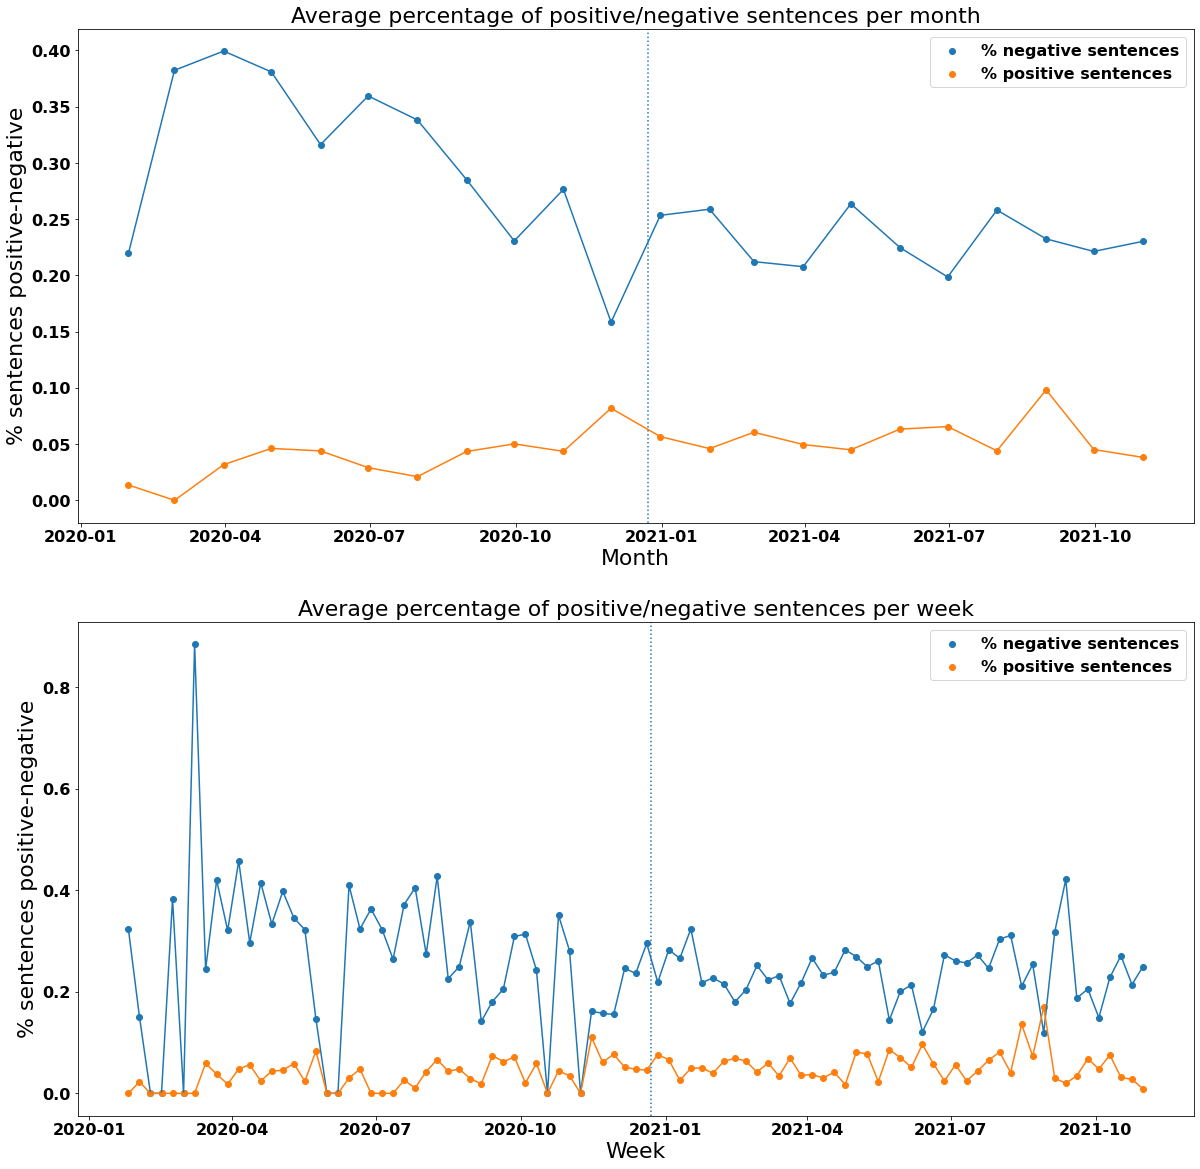

In [45]:
sentiment_analysis(russia,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


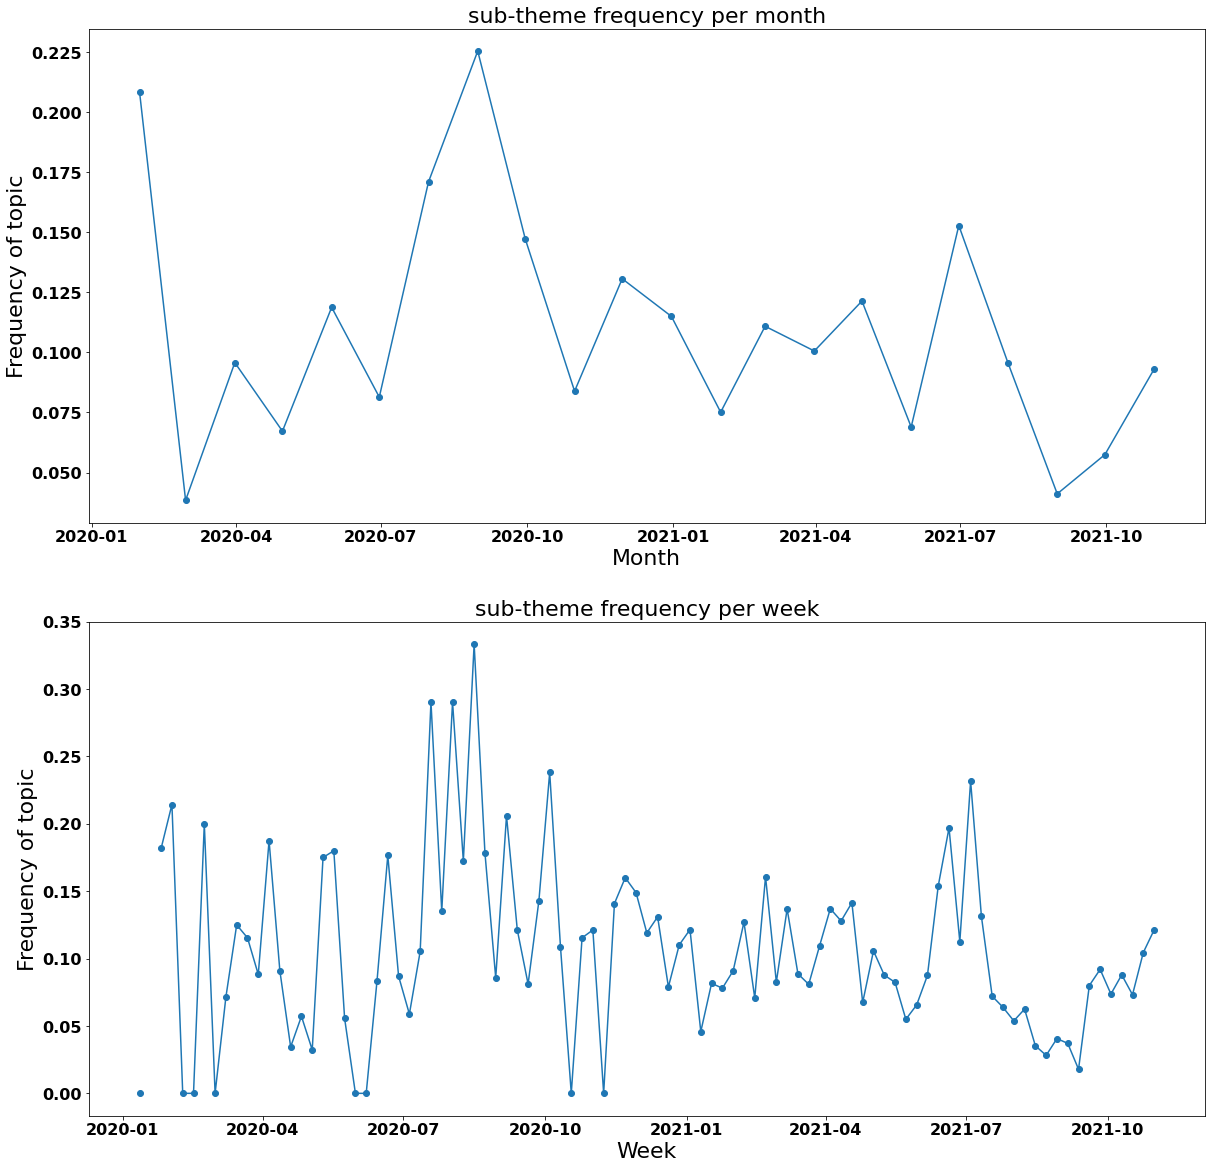

In [46]:
frequency_topics(df_sub,russia)

SAMPLES OF POSITIVE SENTENCES
"We are absolutely open and committed to partnership," Vladimir Putin said in a video recorded and broadcast at the UN General Assembly.
Russian President Vladimir Putin ordered on Wednesday to start vaccinating all sections of the population against the coronavirus next week, saying his country's vaccine is the "best".
SAMPLES OF NEGATIVE SENTENCES
Over the last 14 days: With regard to vaccination: For the second consecutive day, Russia has recorded a record number of deaths due to the coronavirus: 857 people have died in the last 24 hours compared to 852 the day before, according to government figures.
The majority of the opposition was banned from the polls, the culmination of months of repression that began with the arrest of its leader, Alexei Navalny, as he returned to Russia in January after a poisoning incident of which he accuses the Kremlin.


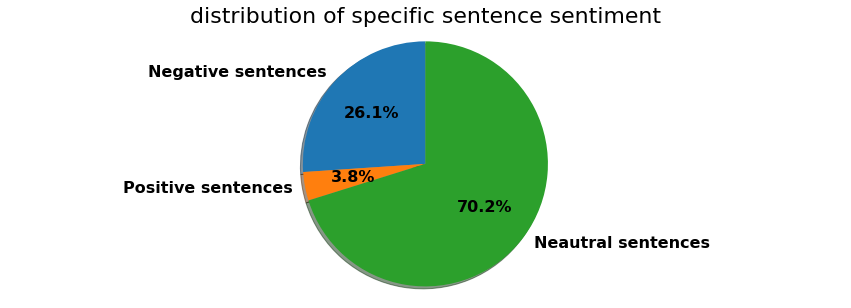

In [47]:
sentences_with_word(russia,russia_words)

In [48]:
india_words="India|Dheli"
india=df_sub[(df_sub['Title_en'].str.contains(india_words))|(df_sub['Text_en'].str.contains(india_words))]
len(india)/len(df_sub)

0.09839027595269383

SAMPLES OF POSITIVE HEADLINES
A massive campaign - India launches record-breaking immunization
Joe Biden's choice on vaccine patents could be a turning point
How blockchain can transform health and humanitarian work
SAMPLES OF NEGATIVE HEADLINES
More than 8,700 cases in three days in Switzerland, new restrictions in Hong Kong, the opening of ski resorts still sows discord: the news of 30 November
In search of the solidarity vaccine
Covid-19 - US exceeds 700,000 Covid-19 deaths


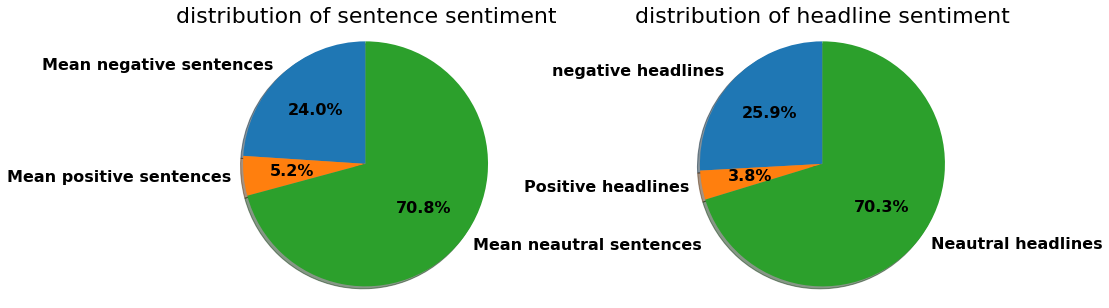

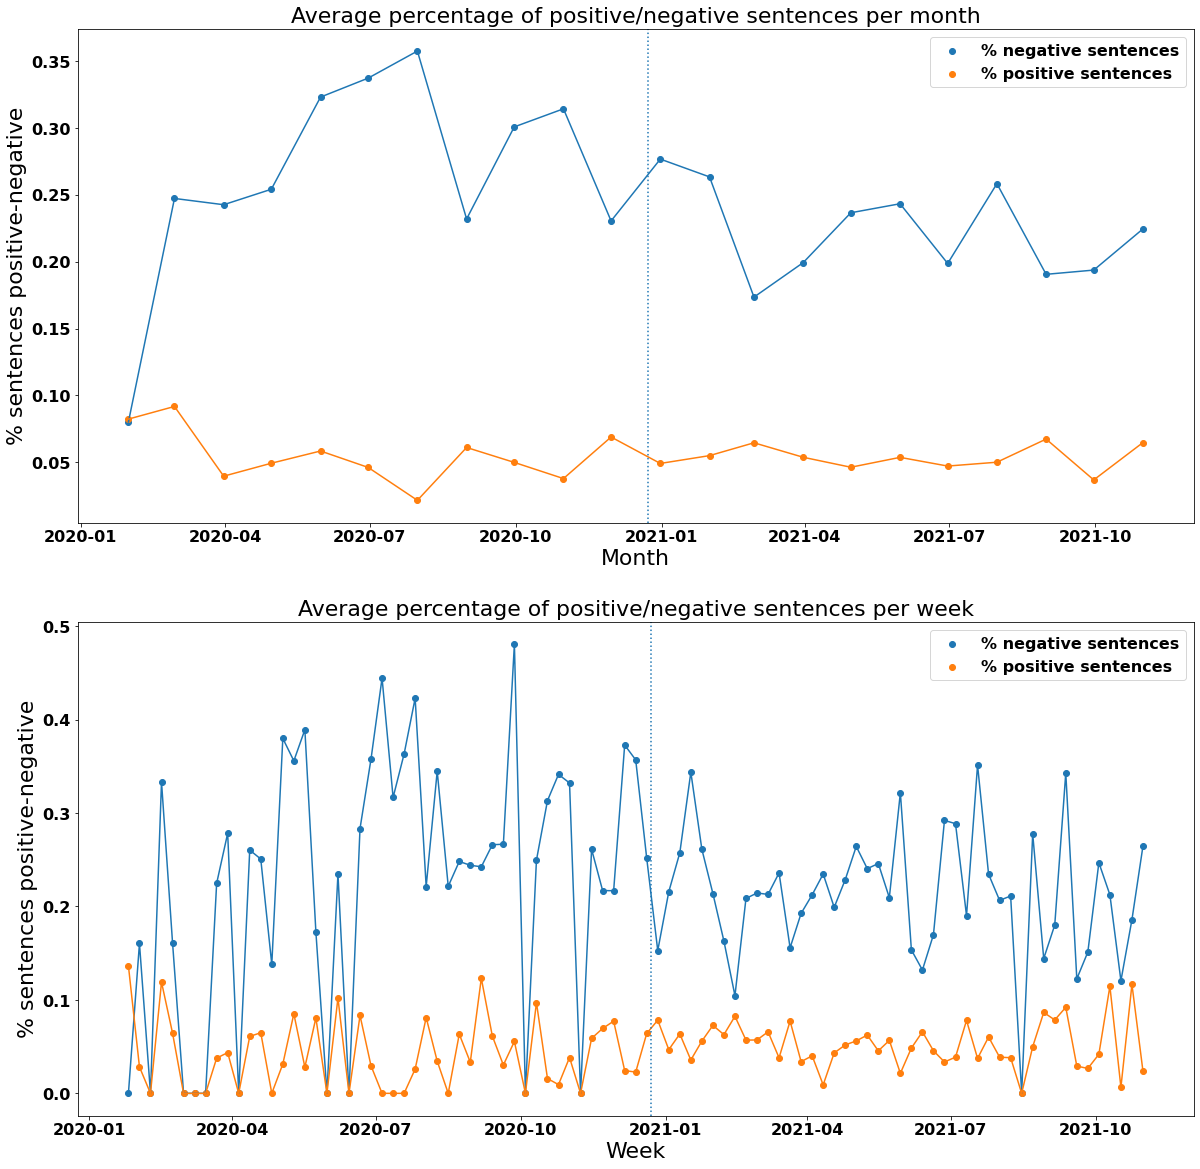

In [49]:
sentiment_analysis(india,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


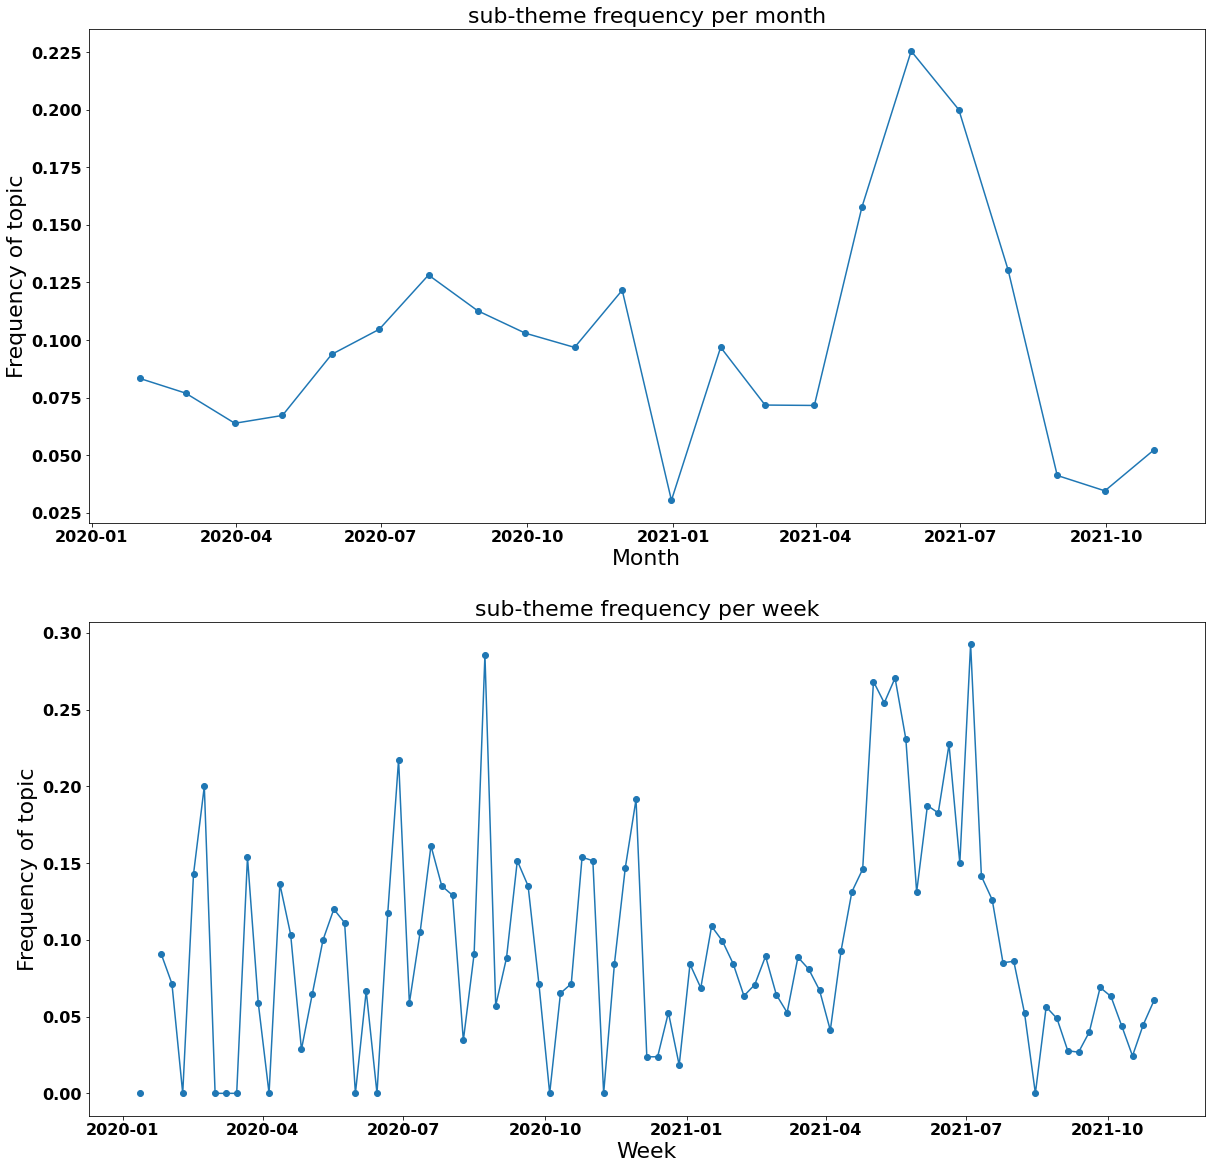

In [50]:
frequency_topics(df_sub,india)

SAMPLES OF POSITIVE SENTENCES
Vaccines from Moderna and Pfizer/BioNTech are expected to remain effective against the Indian variant of the coronavirus.
The US has also announced that more aid - medicines, rapid diagnostic tests, respirators, personal protective equipment - will be deployed in the next few days to support the Indian government in its fight against Covid-19.
SAMPLES OF NEGATIVE SENTENCES
The countries with the most new deaths in their latest reports are the United States with 822 new deaths, Italy (541) and India (443).
Since we would have to get some of our liquid oxygen from India, I have given up installing a tank in our hospital," she says.


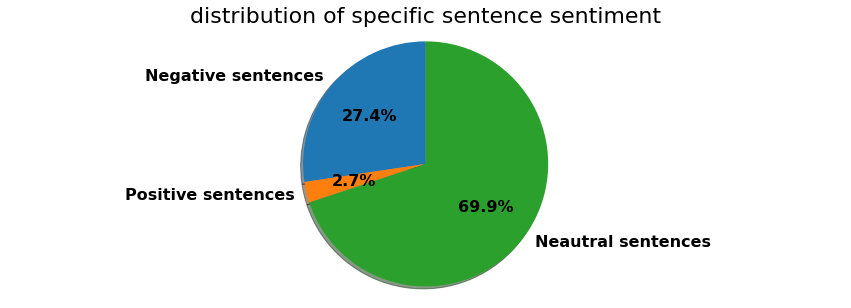

In [51]:
sentences_with_word(india, india_words)

In [23]:
switzerland_words="Parmelin|Sommaruga|Berset|Cassis"
switzerland=df_sub[(df_sub['Title_en'].str.contains(switzerland_words))|(df_sub['Text_en'].str.contains(switzerland_words))]
len(switzerland)/len(df_sub)

0.11251642575558475

SAMPLES OF POSITIVE HEADLINES
A financial boost for crèches
Swiss aviation calls for a breath of fresh air
1 August festivities - Ignazio Cassis celebrates Switzerland's diversity from Bangkok
SAMPLES OF NEGATIVE HEADLINES
The Federal Council's extensive vaccination offensive
Chasing the divisive virus with Alexandre Jollien
Federal Council angers restaurant owners


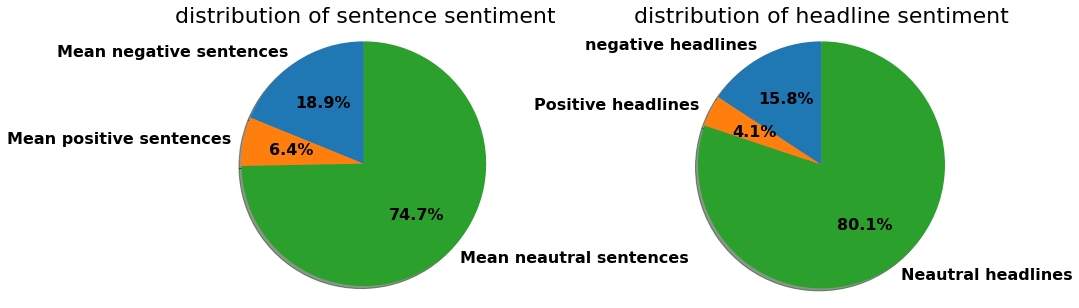

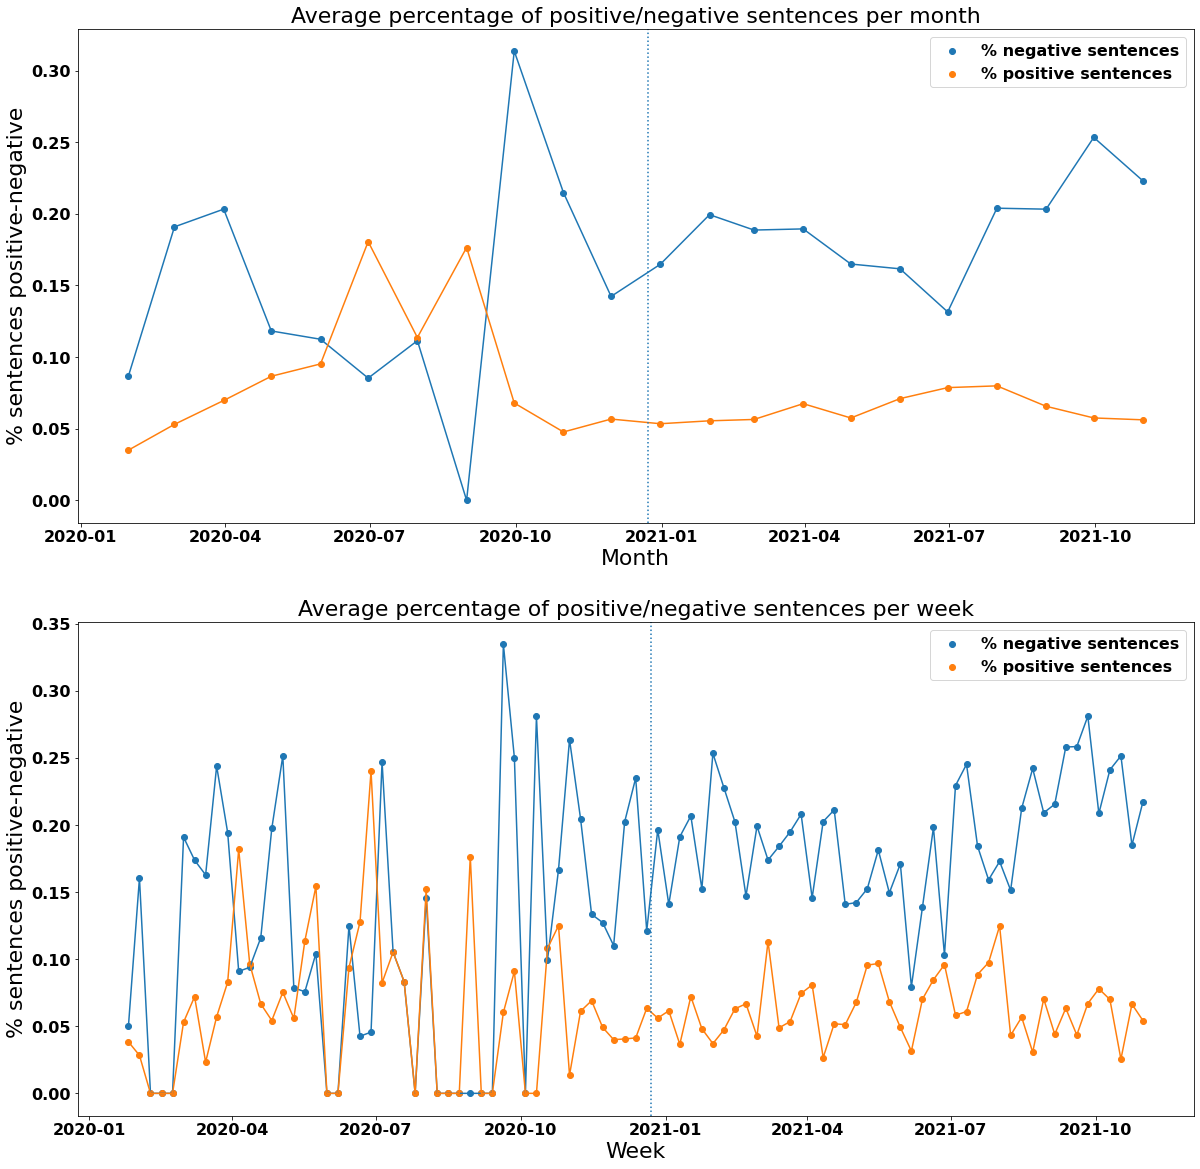

In [24]:
sentiment_analysis(switzerland,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


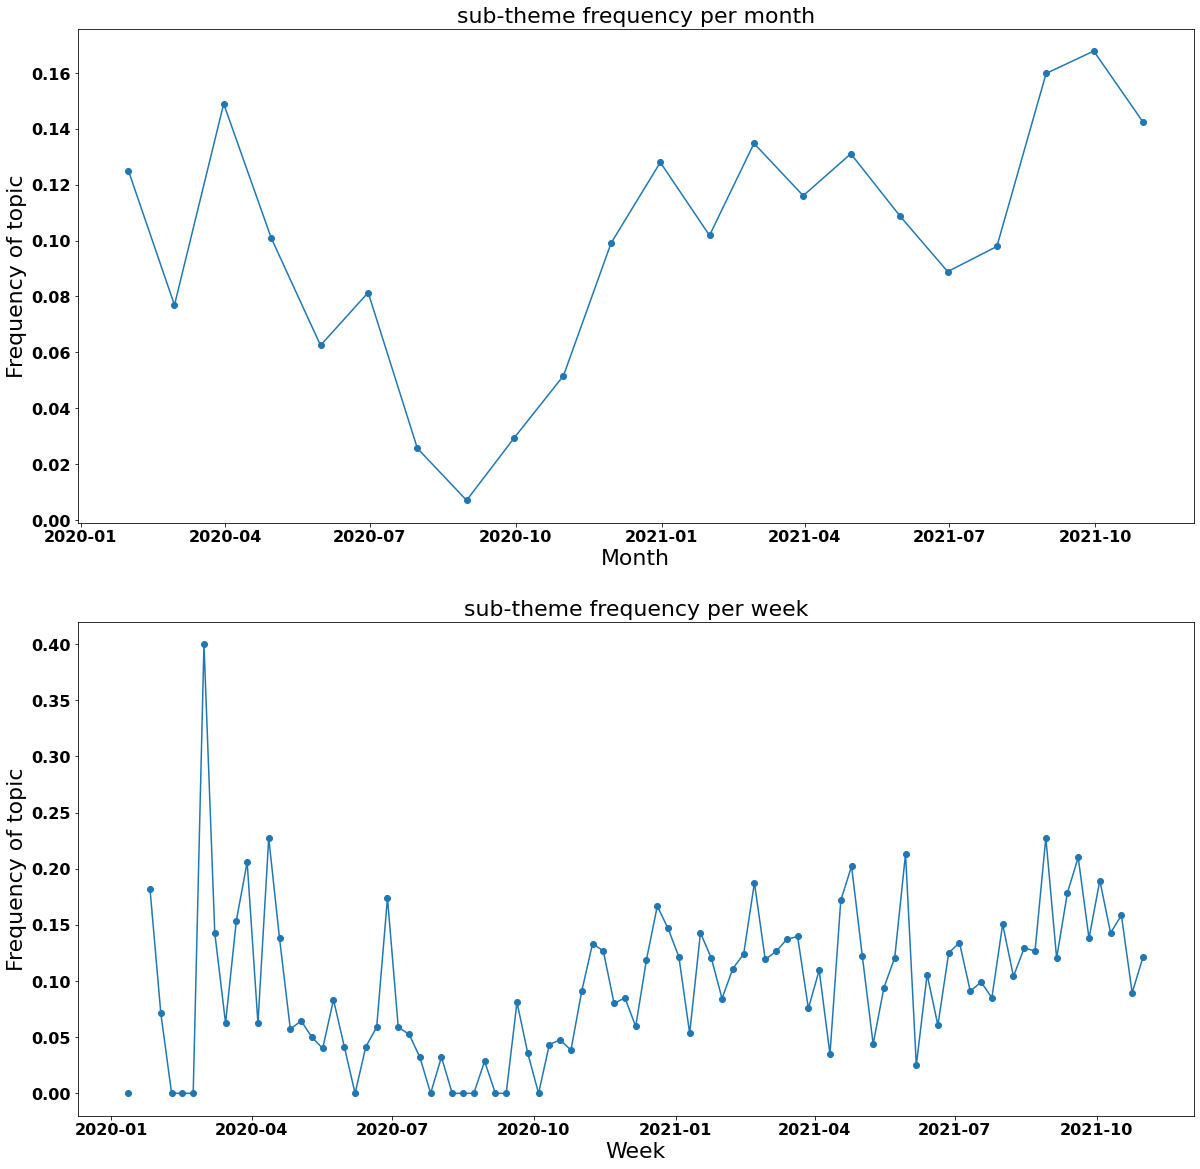

In [25]:
frequency_topics(df_sub,switzerland)

SAMPLES OF POSITIVE SENTENCES
Tedros Adhanom Ghebreyesus thanked Federal Councillor Alain Berset for this initiative.
We have nothing against Mr. Berset, everything is working very well, there is no point in creating tensions.
SAMPLES OF NEGATIVE SENTENCES
"This is not enough," insists Alain Berset.
Alain Berset added: "The number of cases of the new mutation doubles every week and heralds a potentially explosive third wave.


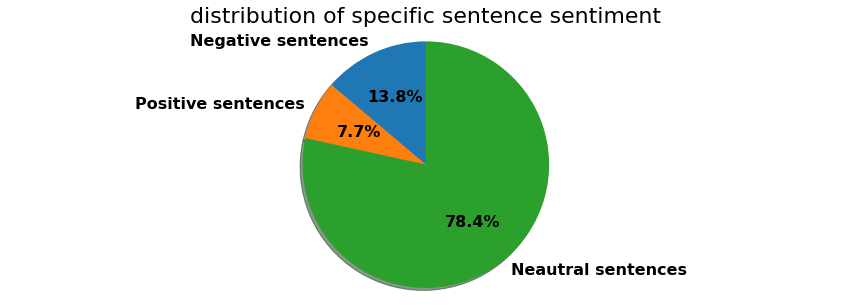

In [55]:
sentences_with_word(switzerland,switzerland_words)

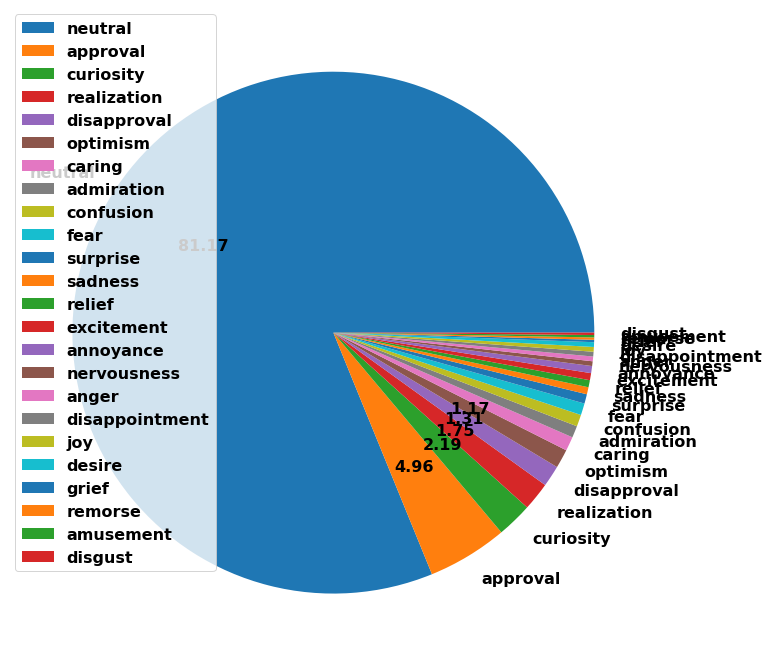

In [26]:
plot_emotions(switzerland)

## VACCINES

SAMPLES OF POSITIVE HEADLINES
Covid-19 - AstraZeneca's vaccine performs well in the elderly
Coronavirus - AstraZeneca/Oxford vaccine, the UK's hope
European Medicines Agency - AstraZeneca vaccine is "safe and effective
SAMPLES OF NEGATIVE HEADLINES
Covid-19 vaccination - Thousands of expired AstraZeneca doses destroyed in Africa
Coronavirus - Further drop in AstraZeneca vaccine shipments in Europe
Disastrous vagueness continues to reign over AstraZeneca vaccine


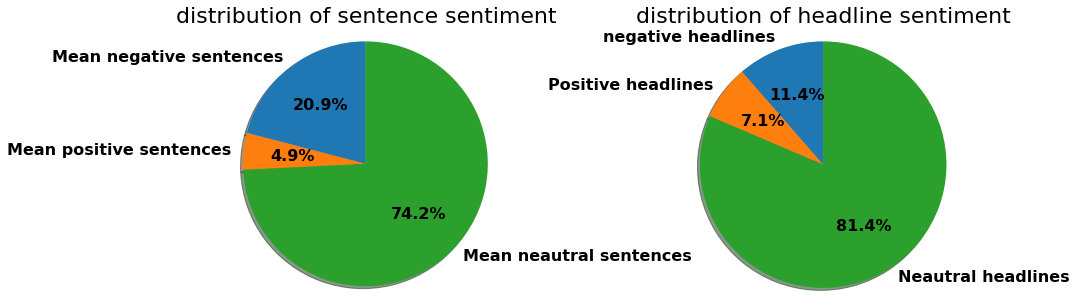

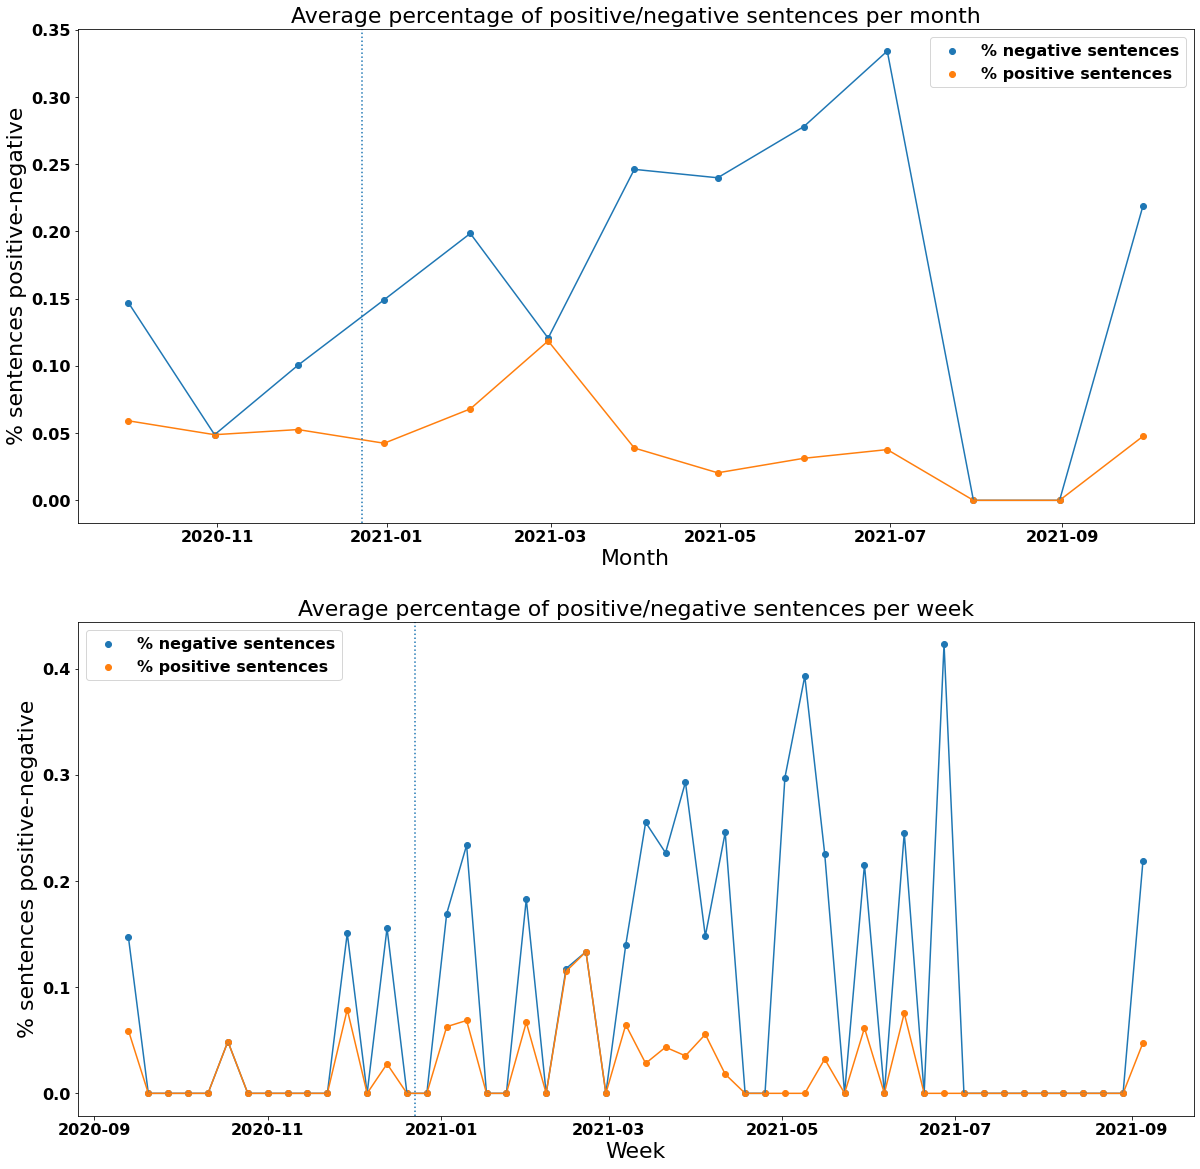

0.011498028909329829

In [56]:
astrazeneca_h=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))&(~df_sub['Title_en'].str.contains("Pfizer|Moderna"))]
sentiment_analysis(astrazeneca_h,'2020-12-23')
len(astrazeneca_h)/len(df_sub)

In [57]:
astrazeneca_h_t=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))|(df_sub['Text_en'].str.contains("Astrazeneca|AstraZeneca"))]

SAMPLES OF POSITIVE SENTENCES
AstraZeneca is "committed to providing access to 170 million doses of the vaccine in 190 countries".
AstraZeneca's coronavirus vaccine is "safe and effective".
SAMPLES OF NEGATIVE SENTENCES
So much for AstraZeneca - we hardly have any anyway - so much for the [eventual] common European decision'... War is war?
Three new cases of blood clots associated with AstraZeneca's Covid-19 vaccine, with two additional deaths, occurred in France between 19 and 25 March.


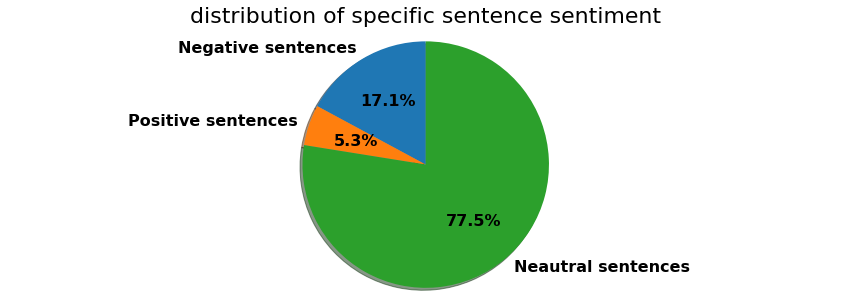

In [58]:
sentences_with_word(astrazeneca_h,'AstraZeneca')

SAMPLES OF POSITIVE HEADLINES
Pfizer's Covid vaccine - WHO boss welcomes "encouraging news
Coronavirus - Finally, the Pfizer/BioNTech vaccine is 95% effective
Coronavirus - Pfizer announces that its vaccine is "90% effective
SAMPLES OF NEGATIVE HEADLINES
Coronavirus - Pfizer vaccine delivery delayed in eight European countries
One in 100,000 people have suffered an allergic shock to the Pfizer vaccine
Coronavirus - Cyber attack: Pfizer documents hacked


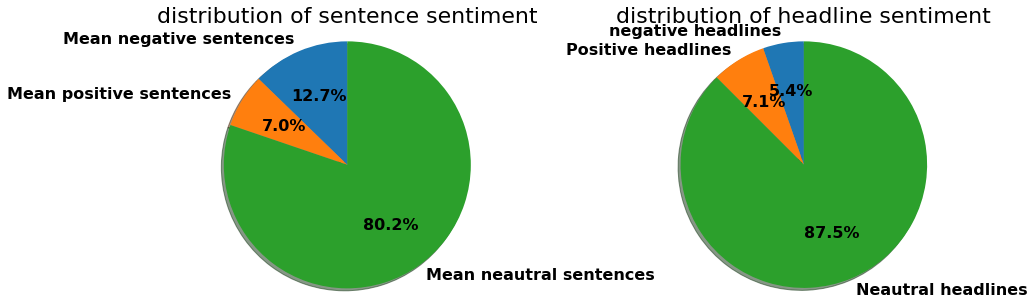

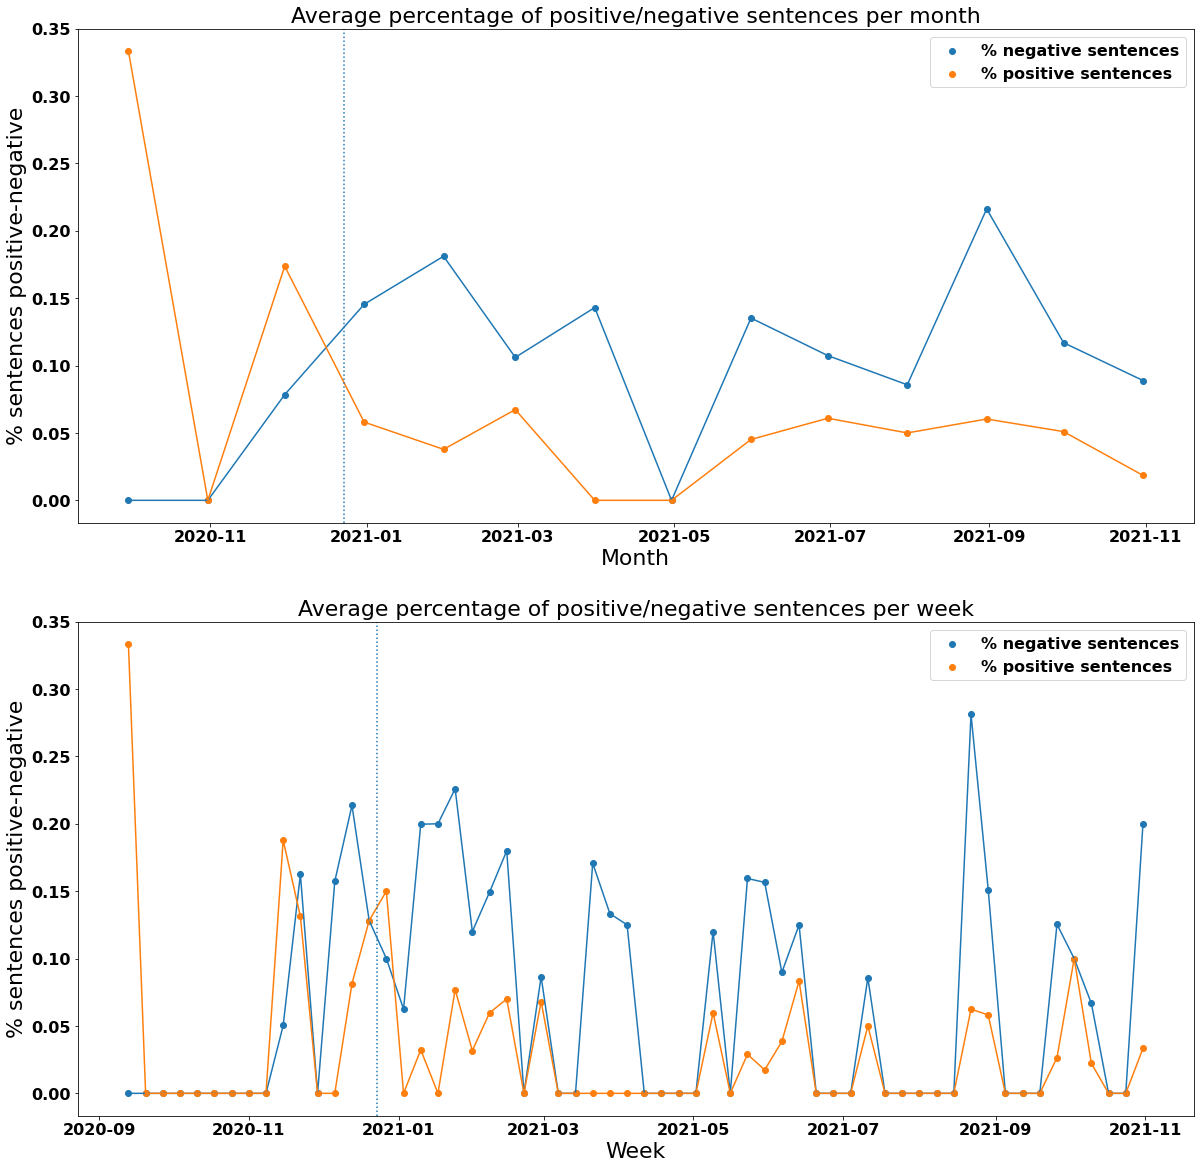

0.009198423127463863

In [59]:
pfizer_h=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Moderna"))]
sentiment_analysis(pfizer_h,'2020-12-23')
len(pfizer_h)/len(df_sub)

In [60]:
pfizer_h_t=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))|(df_sub['Text_en'].str.contains("Pfizer|pfizer"))]

SAMPLES OF POSITIVE SENTENCES
Joe Biden had previously, in a statement issued by his transition team, welcomed the announcement by Pfizer and BioNTech laboratories of a "90%" effective vaccine against Covid-19, which gives "so much reason for hope".
The British pharmaceutical group AstraZeneca said on Sunday that it had achieved "100% protection" against severe forms of Covid-19 with its vaccine developed with Oxford University, which was eagerly awaited because it was inexpensive and did not require as low a temperature as the Pfizer/BioNTech vaccine.
SAMPLES OF NEGATIVE SENTENCES
He stated in several media that he was personally reluctant to receive the Pfizer/BioNTech vaccine, in particular because he had "never seen" such a high frequency of adverse effects.
The canton of Berne is in turn affected, like other European regions and countries, by Pfizer's slow delivery.


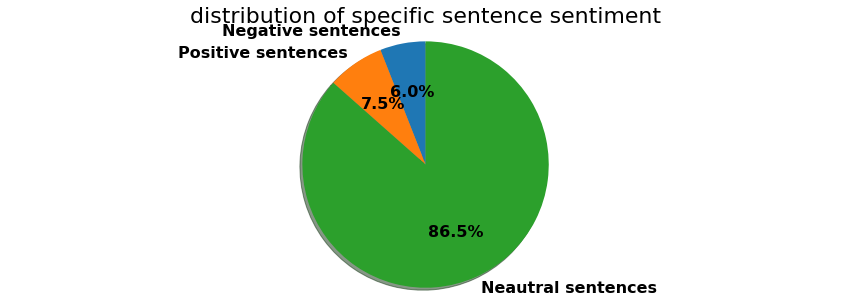

In [61]:
sentences_with_word(pfizer_h_t,'Pfizer')

SAMPLES OF POSITIVE HEADLINES
Moderna announces that its vaccine is 94.5% effective
Combating Coronavirus - Moderna vaccine will bring relief to logistics
European authority approves Moderna vaccine for 3rd dose, shows good results in children: 25 October news
SAMPLES OF NEGATIVE HEADLINES
United States - Moderna's vaccine will not be ready before the election
Moderna's vaccine sends US stock markets into a tailspin
Moderna vaccine suspended in Sweden: an update on the situation


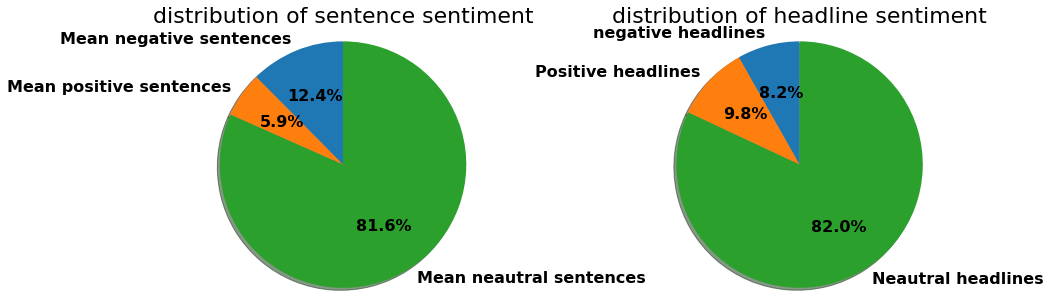

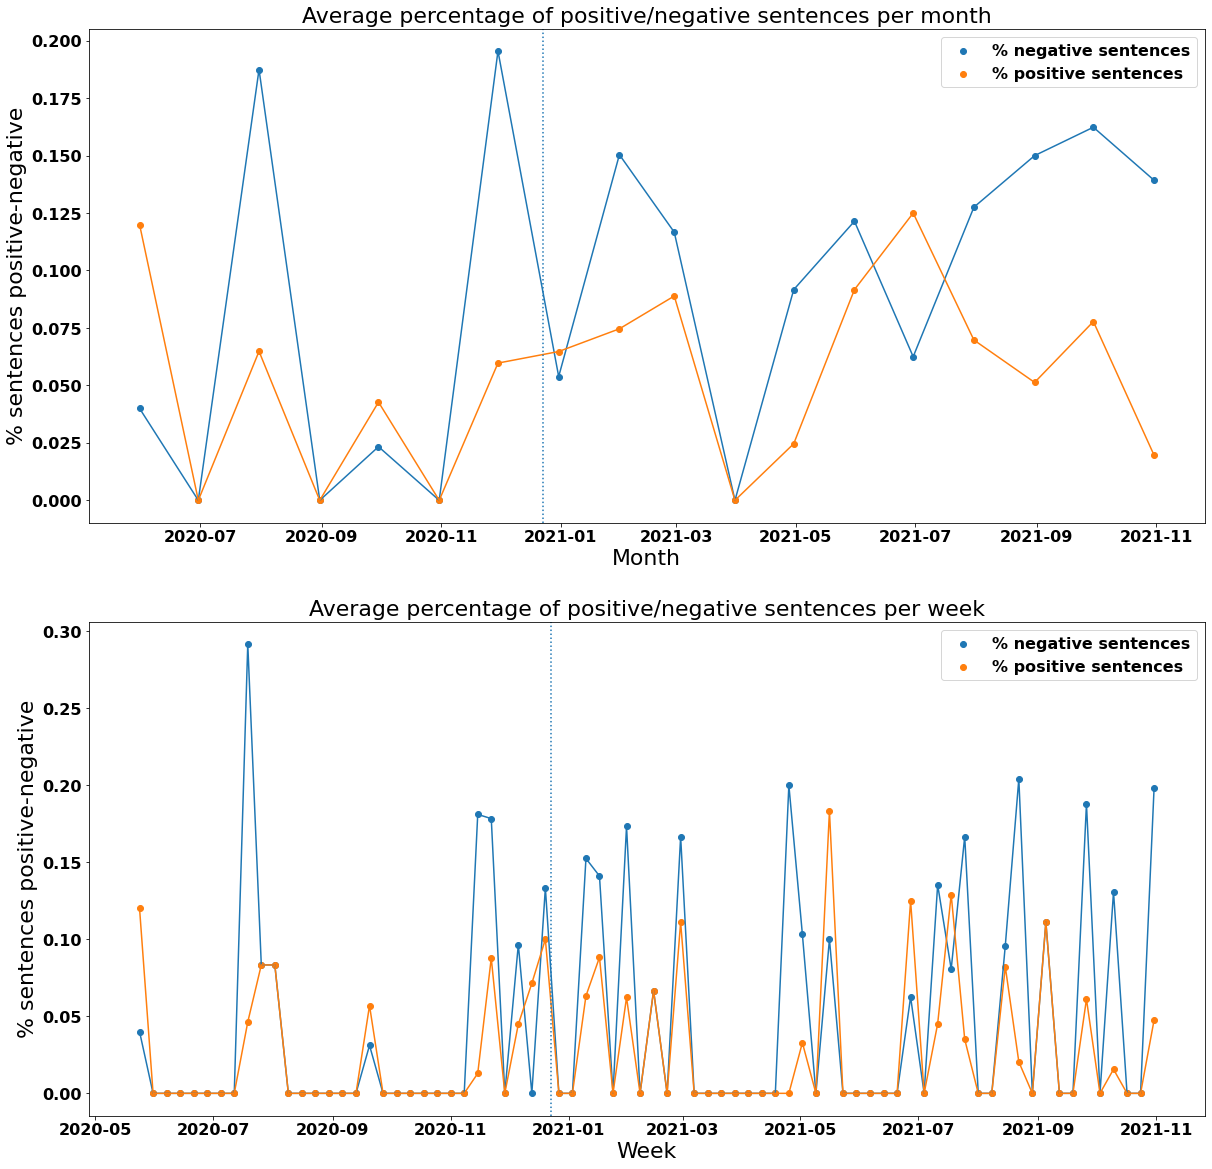

0.010019710906701708

In [62]:
moderna_h=df_sub[(df_sub['Title_en'].str.contains("Moderna|moderna"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Pfizer"))]
sentiment_analysis(moderna_h,'2020-12-23')
len(moderna_h)/len(df_sub)

In [63]:
moderna_h_t=df_sub[(df_sub['Title_en'].str.contains("Moderna"))|(df_sub['Text_en'].str.contains("Moderna"))]

SAMPLES OF POSITIVE SENTENCES
"We are pleased that our test (...), which targets the nucleocapsid protein, is now also being used in Moderna vaccine testing, which could ultimately help end this pandemic," Thomas Schinecker, head of the Basel-based company's diagnostics division, said in a statement.
In any case, in the City of Calvin, the vision of the Moderna project, known at the beginning as LS-18, is very popular: "Creating a company, starting with a venture capital fund, is very unusual in the life sciences sector.
SAMPLES OF NEGATIVE SENTENCES
The plant, which could contain a vaccine bottling unit, is expected to produce 500 million doses a year, more than the 450 million at Norwood (a plant in Massachusetts) and the one Moderna will launch in Canada.
Contacted by Le Temps on Tuesday, Moderna half-heartedly acknowledged that it had been targeted: "We are aware of the announcements concerning cyber attacks against companies such as ours.


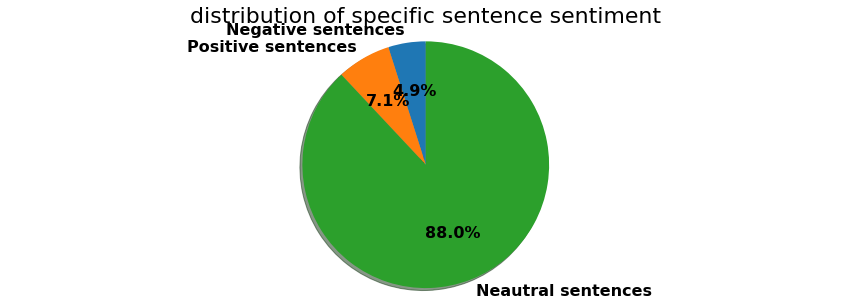

In [64]:
sentences_with_word(moderna_h,'Moderna')

# SENTENCES ANALYSIS

In [65]:
def sentiment_analysis_headlines(subset):
    #POSITIVE HEADLINES
    print('\033[1m' +"SAMPLES OF POSITIVE HEADLINES")
    try:
        for i in subset[subset['sentiment_title']=="Positive"].sample(20).Title_en: 
            print('\033[0m' + i)
    except: 
        try:
            for i in subset[subset['sentiment_title']=="Positive"].sample(20).Title_en: 
                print('\033[0m' + i)
        except:
            print("No samples of positive headlines")
    #NEGATIVE HEADLINES
    print('\033[1m' +"SAMPLES OF NEGATIVE HEADLINES")
    try:
        for i in subset[subset['sentiment_title']=="Negative"].sample(50).Title_en: 
            print('\033[0m' + i)
    except: 
        try: 
            for i in subset[subset['sentiment_title']=="Negative"].sample(50).Title_en: 
                print('\033[0m' + i)
        except:
            print("No samples of negative headlines")
            
        
    #date_headlines(subset)
    
    df_headlines_pos = len(subset[subset['sentiment_title']=="Positive"])/len(subset)
    df_headlines_neg = len(subset[subset['sentiment_title']=="Negative"])/len(subset)
    df_headlines_neu = len(subset[subset['sentiment_title']=="Neutral"])/len(subset)
    labels_headlines = 'negative headlines', 'Positive headlines', 'Neautral headlines'
    sizes_headlines = [df_headlines_neg,df_headlines_pos,df_headlines_neu]
    # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots(figsize=(15, 5))

    
    ax1.pie(sizes_headlines, labels=labels_headlines, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set(title="distribution of headline sentiment")
    plt.show()
    

SAMPLES OF POSITIVE HEADLINES
My wishes for football in 2021
Editorial - It's going well
Vital agreement reached in Geneva - Industry finally responds to the oxygen crisis
Innovation as a societal and stock market driver
"But, apart from that, Madame la Marquise, All is well, all is well"
Portrait of Nora Kronig Romero - "I have never stopped enjoying my work
Courses vaudoises 2021 - An entry to boost morale
Vaccinations are going well
2020, a record year for Swiss biotech
A strong pharma place: the best defence against crises
Putin praises Russian coronavirus vaccine
Africa - Cape Verdean ruling party wins legislative elections
El Salvador's president now holds all the power
Diving into the excitement of Lonza in Visp
Tony Blair: "Joe Biden is the right person in the right place at the right time
European authority approves Moderna vaccine for 3rd dose, shows good results in children: 25 October news
Editorial - To win, let's play together!
Israeli elections: Netanyahu speaks of a hug

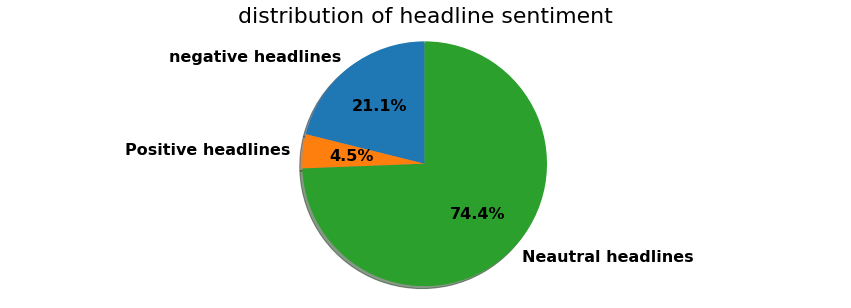

In [66]:
sentiment_analysis_headlines(df)

In [67]:
very_negative_articles=df.sort_values('porcentage_negative', ascending=False).head(10)

In [68]:
negative_sentences_list=[]

In [69]:
from operator import itemgetter
for i,row in very_negative_articles.iterrows(): 
    indices = [index for index, element in enumerate(very_negative_articles['list_labels'][i]) if element == 0]
    res_list = list(itemgetter(*indices)(very_negative_articles.list_sentences[i]))
    negative_sentences_list.append(res_list)

In [70]:
negative_sentences_list

[["In early March 1900, in San Francisco, the Chinese-American 'Chick Gin' became the first victim of the bubonic plague in continental America.",
  'Microbiology was still in its infancy and the cause of death was not immediately confirmed.',
  'However, the political and health authorities of the time took measures that unfortunately still resonate today.',
  'Fearing the economic impact of the dreaded disease, the Governor of California categorically denied the existence of the plague, but successive quarantines were nevertheless imposed on Chinatown.',
  'Read also: While Chinese immigrants have historically been described as "ticking time bombs", Americans have not been the only ones to associate a disease with marginalised groups.',
  'Indeed, the ostracism of certain populations has a long and sordid history, as the panicked fear that usually surrounds the emergence of new and often poorly understood diseases sometimes tends to reinforce existing social stereotypes.',
  'Thus, i

In [76]:
dict={'neg_sentences':negative_sentences_list}
negative_sentences= pd.DataFrame(dict)
negative_sentences

neg_sentences
0  [In early March 1900, in San Francisco, the Ch...
1  [On 11 January 2020, China announced its first...
2  [A year and a half after the outbreak of the C...
3  [The coronavirus pandemic is likely to boost o...
4  [The country passed the 300,000 death mark in ...
5  [These experts are alarmed by his "putschist" ...
6  [Hundreds of people again took part in rallies...
7  [Could this be the beginning of the end of the...
8  [Brazil passed the 3,000 daily death mark for ...
9  [The death toll from the Covid-19 pandemic has...

In [77]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa')

2022-07-05 16:51:11.512112: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-05 16:51:11.513107: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-05 16:51:11.513768: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david-Aspire-A315-42): /proc/driver/nvidia/version does not exist
2022-07-05 16:51:11.519222: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-05 16:51:11.897746: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154414

In [78]:
def get_emotion_label(text): 
    return(emotion(text)[0]['label'])

In [71]:
very_negative_articles

Title_en  \
5361          From health scourges to social prejudice?   
2639  Coronavirus - One year of pandemic and two mil...   
1862  The world has not learned the lessons of the C...   
4462  Unprecedented quantities' of cocaine entering ...   
5973  Covid-19 flares up in Brazil, which passes the...   
1260  Politics in Brazil - Bolsonaro "putschist" and...   
2685  Brazil - Demonstrators demand Jair Bolsonaro's...   
4579                                  The rout of India   
5582  More than 3,000 deaths from Covid-19 in 24 hou...   
495   Pandemics - The ravages of coronavirus compare...   

                                                Text_en  \
5361  In early March 1900, in San Francisco, the Chi...   
2639  On 11 January 2020, China announced its first ...   
1862  A year and a half after the outbreak of the Co...   
4462  The coronavirus pandemic is likely to boost or...   
5973  The morbid figures of the Covid-19 pandemic ar...   
1260  President Jair Bolsonaro is becoming increasin...   
2685  Hundreds of people again took part in rallies ...   
4579  Could this be the beginning of the end of the ...   
5582  Brazil passed the 3,000 daily death mark for C...   
495   The death toll from the Covid-19 pandemic has ...   

                                                Authors        Date  \
5361  Duncan McLean, Docteur en histoire et chargé d...  2020-03-02   
2639                                              error  2021-01-15   
1862                                              error  2021-10-26   
4462                                                AFP  2021-04-12   
5973                                           ats, afp  2021-03-25   
1260                                              error  2021-09-08   
2685                                              error  2021-01-31   
4579                                      Marc Allgöwer  2021-04-30   
5582                                           ats, afp  2021-03-24   
495                                               error  2020-09-28   

                                                   Link   Newspaper  \
5361  https://www.letemps.ch/opinions/fleaux-sanitai...    Le Temps   
2639  https://www.24heures.ch/un-an-de-pandemie-et-d...   24 heures   
1862  https://www.24heures.ch/le-monde-na-pas-tire-l...   24 heures   
4462  https://www.letemps.ch/monde/quantites-precede...    Le Temps   
5973  https://www.laliberte.ch/news-agence/detail/le...  La Liberte   
1260  https://www.24heures.ch/un-bolsonaro-putschist...   24 heures   
2685  https://www.24heures.ch/des-manifestants-exige...   24 heures   
4579      https://www.letemps.ch/opinions/deroute-indes    Le Temps   
5582  https://www.laliberte.ch/news-agence/detail/pl...  La Liberte   
495   https://www.24heures.ch/les-ravages-du-coronav...   24 heures   

     sentiment_title                                     list_sentences  \
5361         Neutral  [In early March 1900, in San Francisco, the Ch...   
2639        Negative  [On 11 January 2020, China announced its first...   
1862        Negative  [A year and a half after the outbreak of the C...   
4462        Negative  [The coronavirus pandemic is likely to boost o...   
5973        Negative  [The morbid figures of the Covid-19 pandemic a...   
1260         Neutral  [President Jair Bolsonaro is becoming increasi...   
2685         Neutral  [Hundreds of people again took part in rallies...   
4579         Neutral  [Could this be the beginning of the end of the...   
5582        Negative  [Brazil passed the 3,000 daily death mark for ...   
495         Negative  [The death toll from the Covid-19 pandemic has...   

                                            list_labels  porcentage_positive  \
5361  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             0.000000   
2639  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...             0.000000   
1862                  [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0]             0.090909   
4462  [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 

In [42]:
pd.options.display.max_colwidth = 100
df[df['emotion_transformers_1']=="realization"]

Title_en  \
56                                      Epidemic - 40 years ago, humanity triumphed over smallpox   
147                    Covid-19 - New confinements on the eve of the first vaccinations in the EU   
386   End of compulsory teleworking - The return to the office at the end of May will not be easy   
482                              Automobile - Geneva cautiously relaunches its Motor Show in 2022   
483              Fighting Covid-19 - Switzerland's university hospitals have reached their limits   
...                                                                                           ...   
5990                                                         The conquest of the market has begun   
6039                                                      The pace of vaccination is accelerating   
6094                                                       The virus is losing ground in Freiburg   
6096                                                              The pandemic was underestimated   
6103                                    Confidence in vaccines remains low but is rising slightly   

                                                                                                  Text_en  \
56    On 8 May 1980, members of the World Health Organization declared in Geneva that "all peoples" we...   
147   Austria, Scotland and Northern Ireland are confining their populations again on Saturday, the da...   
386   Goodbye living room, hello colleagues! For hundreds of thousands of employees, a huge change is ...   
482   After two cancellations in 2020 and 2021, the Geneva Motor Show will return cautiously in 2022 w...   
483   With the coronavirus pandemic, Switzerland's five university hospitals have reached the limits o...   
...                                                                                                   ...   
5990  Sales of Covid-19 vaccines are expected to exceed $10 billion a year Yves Genier Pandemic "The y...   
6039  Protection " At least one dose of vaccine by the end of June: this is one of the new scenarios p...   
6094  The number of infections and hospitalizations has been decreasing significantly for several week...   
6096  "We were far from imagining that this pandemic would last so long" (Alain Berset, 15 March). The...   
6103  Confidence in vaccination remains low in Europe, but is tending to increase slightly, including ...   

              Authors        Date  \
56              error  2020-05-08   
147             error  2020-12-26   
386       Lise Bailat  2021-05-15   
482             error  2021-09-02   
483             error  2021-05-06   
...               ...         ...   
5990      Yves Genier  2021-01-06   
6039            error  2021-03-26   
6094  Nicolas Maradan  2021-06-01   
6096            error  2021-03-23   
6103         ats, afp  2020-09-11   

                                                                                                     Link  \
56                        https://www.24heures.ch/monde/40-ans-humanite-triomphait-variole/story/14927376   
147   https://www.24heures.ch/nouveaux-confinements-a-la-veille-des-premieres-vaccinations-dans-lue-91...   
386             https://www.24heures.ch/le-retour-au-bureau-fin-mai-ne-sera-pas-une-sinecure-604051761734   
482             https://www.24heures.ch/geneve-relance-prudemment-son-salon-de-lauto-en-2022-678573852897   
483   https://www.24heures.ch/les-hopitaux-universitaires-de-suisse-ont-atteint-leurs-limites-17718132...   
...                                                                                                   ...   
5990                       https://www.laliberte.ch/news/economie/la-conquete-du-marche-a-commence-590323   
6039          https://www.laliberte.ch/news/suisse/la-cadence-s-accelere-en-matiere-de-vaccination-599464   
6094              https://www.laliberte.ch/news/regions/canton/le-virus-perd-du-terrain-a-fribourg-606797   
6096                            

In [ ]:
fr_words="France"
fr=df[(df['Title_en'].str.contains(fr_words))|(df['Text_en'].str.contains(fr_words))]
print(len(fr)/len(df))

spain_words="Spain"
spain=df[(df['Title_en'].str.contains(spain_words))|(df['Text_en'].str.contains(spain_words))]
print(len(spain)/len(df))

uk_words="United Kingdom|UK"
uk=df[(df['Title_en'].str.contains(uk_words))|(df['Text_en'].str.contains(uk_words))]
print(len(uk)/len(df))


sw_words="Switzerland"
sw=df[(df['Title_en'].str.contains(sw_words))|(df['Text_en'].str.contains(sw_words))]
print(len(sw)/len(df))

it_words="Italy"
it=df[(df['Title_en'].str.contains(it_words))|(df['Text_en'].str.contains(it_words))]
print(len(it)/len(df))